# COMP0088 Individual Coursework: **Heroes of Machlearnia**


# Instructions

For this assignment you are asked to analyse some data and make
predictions from it, explaining and justifying the choices you
make along the way.

**Your dataset is ID 3114906121. This data is unique to you.**

Although everyone is solving the same overall shape of problem, the
details will vary and may give rise to answers that are qualitatively
and numerically different. Do not be surprised if your results do not
agree with those of your colleagues.

The tasks below are mostly solvable with methods covered in the first
half of the module, prior to the coursework release.
One task is deceptively difficult and you may not be able to solve it
“properly”; that is okay, do what you can with the tools available
to you and try to explain why they might be insufficient.
You may employ other methods from beyond the module if you wish,
but there are no bonus marks available for doing so.

All tasks should be performed within this notebook.
For each task, we include:

* an editable **code cell**, in which you should write any code needed
to solve the problem and generate the requisite outputs
* an editable **markdown cell**, in which you should *briefly* explain
your approach and point out anything interesting about the problem
or results

You may find it useful to add further cells for a task, for example to
make your code structure clearer or to interleave plots with your
explanation — this is fine, but make sure that the order and meaning
are unambiguous, and that executing **Run all** on the notebook from
scratch works without errors. Also note that if you split up your text
answer into multiple cells, the word limit applies to the combined total.

**Once you have completed all tasks, submit the whole notebook via Moodle,
along with a CSV file of results that you will generate below.**


# Background

In the bleak highland province of Machlearnia, four clans of
whisky-sodden, claymore-wielding, kilted and bagpiping ruffians
make their homes. They are clans
Carmichael, Mair, Matheson and Mcmullen
and each is more bloodthirsty than the last. Their predilection for
drunken brawling is exceeded only by a profound love of gambling,
and it is by this narrow preference that an uneasy peace has held
for nearly 40 years. Can it survive another?

The highlight of every year is the Autumn Clanmoot, when the clans
come together on neutral ground to feast, carouse, trade insults and
wager vast sums on the arcane sport of Grachlangenball, in a tournament
played over five days. The victorious clan are proclaimed
Heroes of Machlearnia, entitled to wear pheasant feathers in their beards
all winter. They almost never do this, because it looks ridiculous,
but the prize is hotly contested all the same.

Visitors flock to the moot from far beyond the borders of Machlearnia,
for the boozing and spectacle, for the frisson of danger. There is money
to be made and lost, merchandise to be bought and sold, and only a moderate
risk of being run through with a sword.

Visitors like **you**.

This will be your first Clanmoot. You are a stranger around here and you
don't really know how everything works. But you've nosed around a bit and
think you might be able to make your fortune.

The peoples of Machlearnia are characterised by ten frankly cryptic attributes:
avoidance, chirp, curliness, entropy, furriness, gloom, meanness, moisture, vibe and wickedness.
You know that a clan's performance in Grachlangenball is largely
determined by these attributes, but you don't know how — and the
clansfolk aren't telling.
In the run-up to this year's Clanmoot you have cunningly obtained
the stats on all the participants, but you don't know who is who.
However, you have also acquired more complete information from last
year's tournament, so hopefully that will give you some clues.

# Setting Up

## Imports

The following cell imports some commonly used Python libraries for
numerical computing and machine learning. It is possible to complete
all tasks using only these imports.

In [19]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn
import sklearn.linear_model, sklearn.svm, sklearn.neural_network
import sklearn.neighbors, sklearn.tree, sklearn.ensemble
import sklearn.model_selection, sklearn.metrics, sklearn.feature_selection

If for some reason you need to make use of additional libraries
you may do so in the code cell below, with the following provisos:

* **Do not use anything obscure** — libraries should either already
be present on Colab or else readily installable via `pip` with no
configuration required. It is incumbent on you to ensure the markers
will be able to run your code easily, out of the box. We will not
troubleshoot it for you — anything that doesn't work without
intervention will get zero marks.
* **Do not use anything resource intensive** — the time and resources
available for marking this assignment are limited, and we will not even
attempt run anything that is likely to consume a lot of compute, memory
or disk space. This is a modest dataset and there is no reason to
apply heavyweight methods to it.
* **Explain why** you are using these libraries in the markdown cell below.

In [20]:
# TODO: add any additional imports here

**TODO**: give reasons for additional imports, if any


## Data

All the data available to you is embedded in the code cell below as
a string literal in CSV format. When you run the cell it is parsed
into a [Pandas](https://pandas.pydata.org/docs/)
[DataFrame](https://pandas.pydata.org//docs/reference/api/pandas.DataFrame.html)
in the variable `data`. Use this to perform
the tasks in the subsequent sections.

We also create a copy of the dataframe, `answers`. Populate this with
your answers for tasks 2—4, below. Use the code cell at the end of the
notebook to export this to a CSV file, and include that file as part
of your coursework submission.

In [21]:
data_csv = '''avoidance,chirp,curliness,entropy,furriness,gloom,meanness,moisture,vibe,wickedness,clan,prowess,rank
34.32,20.7,50.22,73.64,15.53,74.4,40.04,53.45,18.42,55.36,mcmullen,8993.27,2
33.38,19.6,58.43,74.37,35.98,76.82,33.92,42.72,26.86,51.83,mair,5924.15,1
33.11,19.85,52.82,71.33,42.19,75.49,36.2,50.09,23.51,52.23,mcmullen,8021.41,0
27.57,17.38,55.34,84.63,18.82,73.27,31.91,40.34,15.24,53.28,carmichael,5244.41,2
31.41,18.33,57.08,73.55,25.24,78.06,31.82,46.46,8.98,51.74,mair,6862.98,2
31.03,19.82,51.04,74.75,8.75,72.14,38.62,52.89,12.36,55.16,mcmullen,8774.78,2
30.04,19.73,51.44,73.02,14.25,71.75,36.19,51.43,7.9,54.57,mcmullen,8317.77,2
33.14,16.63,50.16,69.89,27.39,75.63,37.01,50.51,2.79,54.46,mcmullen,8096.33,0
24.43,15.47,56.24,86.51,28.12,75.52,32.18,41.8,20.07,54.28,carmichael,5643.91,2
26.46,17.22,57.63,83.74,49.01,71.33,34.61,40.43,24.21,52.3,carmichael,5411.18,1
27.99,18.14,57.64,81.42,15.03,75.99,33.77,36.39,19.78,52.08,carmichael,4336.63,1
29.32,20.42,55.44,66.56,22.62,78.17,35.55,50.34,12.9,48.38,matheson,8012.95,0
35.52,19.26,52.04,77.9,41.67,79.28,32.8,47.69,18.55,52.61,mair,7284.89,2
34.38,19.96,54.61,71.1,20.92,74.03,37.88,47.59,8.64,54.99,mcmullen,7218.93,0
31.85,19.57,52.28,72.47,17.52,75.31,35.28,48.82,17.67,52.06,mcmullen,7537.95,1
29.18,18.5,55.57,69.97,31.49,79.32,35.14,52.84,14.68,51.15,matheson,8818.44,1
27.1,20.34,51.5,75.2,22.79,75.69,34.86,55.68,15.46,51.42,matheson,9705.57,2
27.57,15.98,55.3,83.26,38.5,75.82,34.56,39.49,12.62,52.18,carmichael,5143.25,1
34.33,21.95,52.1,69.93,16.24,72.92,35.9,50.29,9.67,54.58,mcmullen,7975.36,0
34.47,20.9,56.01,77.35,21.71,77.4,30.37,48.56,33.02,52.35,mair,7434.33,2
35.55,19.01,55.65,77.43,22.79,77.87,34.74,46.99,1.68,53.54,mair,7027.82,2
25.52,17.01,58.72,78.41,16.67,73.84,30.86,34.77,6.99,51.88,carmichael,3971.26,0
27.89,17.86,56.63,81.01,11.52,75.59,32.92,40.01,16.78,51.56,carmichael,5144.88,0
26.19,17.8,57.42,84.24,33.82,74.08,32.46,38.78,2.6,53.39,carmichael,4939.09,2
25.38,17.53,59.66,85.66,32.71,77.77,34.62,41.03,-4.67,52.82,carmichael,5492.76,1
26.87,14.35,59.46,82.24,23.95,74.86,33.45,39.63,16.41,50.93,carmichael,5108.37,0
31.75,19.15,53.57,71.27,13.14,73.18,37.69,50.24,6.58,54.83,mcmullen,7963.89,0
27.31,15.76,62.15,80.57,39.92,72.43,33.79,36.88,7.73,52.51,carmichael,4544.1,1
28.24,20.46,55.24,66.74,18.05,76.98,36.0,47.93,23.09,48.35,matheson,7287.96,0
31.6,19.0,56.35,74.17,18.68,77.61,33.59,46.92,20.93,52.51,mair,6981.66,2
32.97,18.41,52.74,80.26,29.83,78.1,34.67,49.1,-0.61,54.88,mair,7663.8,2
33.62,18.1,51.35,69.71,33.81,76.14,35.73,51.57,19.1,54.49,mcmullen,8435.11,0
33.55,20.54,51.21,69.75,14.14,77.64,39.17,53.77,5.2,55.17,mcmullen,9082.87,0
28.2,19.66,54.03,68.94,12.89,77.57,36.16,53.13,15.89,47.88,matheson,8845.3,1
23.23,18.66,56.98,87.78,23.89,75.75,31.47,42.93,15.2,55.91,carmichael,5907.86,2
33.27,18.83,54.25,76.02,29.77,75.38,32.1,47.39,4.1,52.2,mair,7145.36,0
27.16,15.85,58.86,83.77,33.28,74.64,31.66,38.56,1.56,52.08,carmichael,4878.7,1
25.17,15.12,58.33,84.46,22.57,74.49,34.99,41.54,6.99,54.44,carmichael,5582.03,2
28.34,17.92,58.18,78.95,22.66,75.8,32.15,36.36,8.51,54.19,carmichael,4346.06,2
26.13,22.01,55.2,65.83,27.97,78.61,35.83,49.87,12.25,49.62,matheson,7895.35,0
24.74,21.8,53.24,72.73,13.09,77.34,34.51,49.81,9.37,48.62,matheson,7806.15,2
29.13,20.93,53.24,72.27,19.97,77.18,36.38,57.09,11.62,47.73,matheson,10185.18,2
29.79,19.0,53.52,67.44,18.38,81.78,36.18,54.92,17.69,49.65,matheson,9447.92,0
28.85,19.74,54.04,69.06,3.07,79.1,35.41,49.76,11.81,49.86,matheson,7759.25,1
33.71,19.47,56.43,75.28,36.65,74.79,35.09,46.38,21.43,51.8,mair,6915.73,0
33.79,18.33,52.38,71.59,37.53,76.46,37.89,50.55,4.96,52.72,mcmullen,8157.06,0
26.51,16.4,59.21,81.22,6.14,72.41,35.64,33.77,13.64,49.92,carmichael,3766.76,0
25.12,15.8,56.07,84.25,7.61,72.37,34.4,37.74,2.91,53.62,carmichael,4612.97,2
30.94,21.27,50.83,75.05,40.66,75.27,36.32,49.24,18.63,53.12,mcmullen,7763.2,2
34.37,19.13,51.8,71.47,34.37,76.22,37.52,51.11,23.68,53.98,mcmullen,8311.84,0
24.43,16.26,55.88,84.02,25.65,74.47,33.91,38.75,8.25,54.74,carmichael,4912.46,2
26.58,17.64,57.48,82.43,21.07,76.48,32.69,40.97,20.75,53.98,carmichael,5414.16,2
31.67,21.37,54.25,69.93,19.97,74.47,36.13,45.97,12.66,56.61,mcmullen,6744.75,0
33.92,22.11,52.6,71.07,21.7,75.17,37.61,48.84,10.94,53.47,mcmullen,7581.33,0
32.58,17.99,57.66,75.4,18.16,75.55,33.75,47.26,16.15,53.27,mair,7076.8,0
31.85,19.23,52.95,76.8,12.33,75.57,33.32,48.44,10.31,51.52,mair,7388.61,0
24.17,15.62,57.94,85.36,27.07,74.9,33.2,41.49,20.72,51.99,carmichael,5571.46,1
34.2,21.71,52.37,71.97,26.5,73.23,35.12,52.13,8.41,55.69,mcmullen,8574.65,1
27.2,18.84,52.46,69.46,28.49,76.96,34.53,53.51,8.69,48.86,matheson,9014.59,1
27.29,20.68,53.18,68.9,10.82,77.42,32.34,52.48,13.26,49.11,matheson,8596.78,1
26.88,18.69,55.81,82.52,31.2,74.29,35.72,38.01,17.95,52.9,carmichael,4780.76,1
31.65,20.1,51.97,71.67,39.14,74.18,36.35,48.95,9.72,53.82,mcmullen,7671.99,1
33.32,19.07,54.62,80.91,24.96,77.71,31.86,49.32,21.23,52.58,mair,7683.96,2
28.54,19.24,54.62,72.14,25.55,79.99,35.82,52.54,4.12,49.54,matheson,8705.79,2
34.05,19.67,48.85,72.44,18.22,77.58,34.65,51.29,8.75,54.0,mcmullen,8276.75,1
28.73,19.12,55.89,70.06,19.94,78.62,34.4,50.66,10.85,51.46,matheson,8088.57,2
25.57,15.58,59.91,81.42,31.1,75.08,35.09,36.7,3.31,51.83,carmichael,4480.83,0
34.24,20.97,50.69,76.86,28.87,75.71,38.4,54.77,17.43,56.76,mcmullen,9460.47,2
24.61,18.0,59.5,85.43,17.14,73.92,35.18,40.12,3.43,51.75,carmichael,5214.05,0
32.79,22.63,53.96,71.67,28.98,72.7,35.88,50.14,16.76,54.88,mcmullen,7981.01,1
27.05,19.57,55.06,70.03,19.52,76.47,35.55,50.84,10.45,48.14,matheson,8152.24,2
29.67,22.59,54.76,68.05,30.46,77.25,34.5,49.97,7.1,51.43,matheson,7923.3,0
31.2,19.01,52.37,71.99,15.33,75.51,37.7,50.3,20.19,51.56,mcmullen,7990.84,1
34.17,20.57,55.48,71.31,36.82,75.1,33.05,46.53,24.53,52.4,mair,6939.64,0
32.59,19.08,52.47,73.27,25.47,75.67,36.0,51.56,17.83,54.03,mcmullen,8401.06,2
26.59,20.14,51.9,70.81,26.59,77.76,34.7,53.68,13.39,49.43,matheson,9063.27,2
25.64,18.32,57.31,83.58,37.42,73.61,31.1,41.54,-0.19,50.61,carmichael,5606.25,0
25.72,17.66,60.91,82.46,23.39,76.0,34.58,40.3,24.77,50.49,carmichael,5277.05,0
31.97,16.87,56.64,75.92,13.78,77.97,33.01,49.99,16.09,51.45,mair,7849.25,2
28.4,20.1,51.97,67.41,14.67,79.59,35.37,51.29,-3.44,47.69,matheson,8268.99,0
33.72,18.47,56.12,76.46,28.3,74.63,33.28,47.01,18.95,52.1,mair,7042.49,0
33.77,19.44,53.33,72.39,34.45,75.2,35.76,50.52,9.68,53.89,mcmullen,8116.54,1
35.13,18.81,58.04,73.68,35.92,75.33,32.19,43.9,15.81,52.13,mair,6215.16,0
25.72,18.87,59.46,82.71,14.73,74.08,34.02,39.89,-1.94,50.64,carmichael,5138.68,0
25.23,16.52,55.09,86.28,29.69,76.54,35.3,44.1,12.33,54.15,carmichael,6270.71,2
24.0,16.54,57.09,82.2,-1.47,74.18,33.45,41.74,12.79,53.12,carmichael,5521.91,1
30.7,19.9,51.27,72.44,9.32,76.49,36.49,51.76,14.7,54.06,mcmullen,8402.9,1
26.25,19.93,54.32,68.39,8.18,76.87,34.86,51.39,11.83,48.92,matheson,8269.42,1
27.67,19.85,54.57,66.03,25.55,78.27,36.64,49.9,21.62,50.19,matheson,7901.83,0
32.71,21.96,56.74,69.79,21.11,78.32,37.03,49.36,13.88,50.32,matheson,7727.03,1
30.4,17.68,53.56,67.19,41.37,78.67,35.72,47.81,13.98,48.01,matheson,7344.44,0
29.11,20.34,52.04,70.83,18.33,80.77,34.39,54.04,21.75,50.14,matheson,9143.94,2
28.63,21.69,53.18,68.9,35.41,78.24,33.19,49.63,11.67,50.09,matheson,7829.6,1
28.79,20.79,53.29,68.59,24.93,77.36,36.23,50.59,12.47,49.56,matheson,8103.74,1
24.23,14.24,57.54,85.53,17.45,74.73,34.55,42.24,18.33,52.38,carmichael,5733.38,1
31.42,18.36,51.61,72.44,20.5,75.13,37.05,54.43,11.95,55.49,mcmullen,9303.34,1
27.52,20.9,54.59,64.76,29.59,76.86,36.0,50.84,18.23,52.35,matheson,8196.47,0
28.87,16.9,53.52,66.54,-1.74,77.2,35.3,50.31,16.79,49.45,matheson,7904.1,0
29.16,19.74,51.78,72.8,19.44,75.37,36.58,49.85,14.93,57.24,mcmullen,7862.08,2
34.98,20.23,54.57,74.25,46.46,75.27,31.6,47.12,10.74,52.51,mair,7131.17,0
30.54,22.27,50.97,66.16,26.28,76.66,34.87,51.4,19.61,49.12,matheson,8344.86,0
33.47,17.27,50.77,69.19,25.41,74.79,39.26,49.19,-3.98,53.95,mcmullen,7714.0,0
31.71,21.45,53.68,72.99,48.48,73.95,37.91,50.74,1.7,56.62,mcmullen,8258.89,2
32.7,20.3,52.82,72.17,17.88,73.69,37.34,50.9,16.19,55.29,mcmullen,8179.99,1
30.37,18.54,54.57,79.74,30.94,75.62,33.86,51.99,18.67,51.72,mair,8537.3,0
33.54,18.51,55.96,75.73,10.66,75.36,33.77,46.25,8.19,52.77,mair,6763.68,0
29.75,20.52,56.64,66.02,32.03,77.24,33.67,48.01,18.23,48.3,matheson,7345.93,0
33.91,19.72,52.31,72.25,8.8,75.14,35.4,50.58,14.25,54.67,mcmullen,8028.74,1
25.56,17.19,58.18,81.34,38.64,73.19,34.0,36.98,16.62,52.4,carmichael,4563.02,1
30.78,16.68,55.26,76.63,27.1,76.25,31.34,48.46,12.84,52.68,mair,7435.7,1
26.55,18.52,59.23,83.54,24.65,75.13,32.66,38.13,11.72,50.76,carmichael,4754.33,0
27.73,19.59,53.05,70.15,18.05,76.89,35.48,52.47,21.93,49.3,matheson,8650.86,2
34.5,19.45,54.71,77.82,37.88,77.2,32.15,49.22,21.53,54.4,mair,7708.48,2
27.22,20.76,55.24,69.02,18.75,76.75,35.53,51.53,9.41,52.07,matheson,8360.91,1
33.22,16.53,53.85,79.46,27.54,78.35,32.2,49.31,5.15,52.41,mair,7694.45,2
31.47,21.44,53.86,66.09,34.46,77.94,33.9,48.55,7.83,50.47,matheson,7514.26,0
26.53,17.44,58.62,82.31,50.63,74.03,34.91,34.57,11.3,54.34,carmichael,4101.88,2
31.67,22.33,55.43,78.0,26.31,76.54,33.45,46.64,13.58,54.27,mair,6932.18,1
32.49,20.98,52.29,72.27,21.23,74.8,35.95,51.27,8.76,52.91,mcmullen,8294.31,1
31.47,22.4,50.42,71.25,28.49,75.77,36.67,52.12,21.9,57.23,mcmullen,8593.35,0
25.52,19.42,50.97,69.51,30.95,79.06,35.05,54.42,5.02,50.16,matheson,9323.84,1
33.87,21.07,54.14,71.26,19.68,74.82,34.29,49.66,6.69,54.46,mcmullen,7785.71,0
28.45,22.73,55.32,64.78,34.47,80.55,36.62,52.25,14.34,49.43,matheson,8657.68,0
34.6,18.46,55.54,71.74,11.87,75.79,34.28,46.05,11.3,52.27,mair,6717.93,0
23.05,14.63,56.55,86.56,36.76,72.78,35.88,40.71,5.65,53.23,carmichael,5441.88,2
34.08,17.91,54.85,75.89,27.23,74.89,33.39,46.54,17.39,52.25,mair,6907.22,0
34.06,19.74,57.38,74.51,44.32,76.01,33.74,45.22,2.65,53.34,mair,6615.65,1
28.8,20.14,53.65,66.14,26.64,78.64,36.67,52.62,11.42,50.35,matheson,8743.2,0
22.85,15.57,56.57,86.16,23.42,74.12,35.74,41.49,13.61,50.82,carmichael,5579.65,0
33.22,20.72,51.57,67.36,25.88,74.32,38.45,49.03,19.07,57.57,mcmullen,7661.47,0
32.83,17.1,55.11,77.23,32.0,77.46,33.58,49.56,20.21,55.24,mair,7798.77,2
27.39,22.07,54.11,70.35,9.98,76.78,35.79,52.99,8.39,51.29,matheson,8785.84,2
32.69,19.62,57.53,73.19,34.43,75.56,30.83,45.02,9.24,50.61,mair,6495.53,0
26.23,21.37,53.51,68.06,24.35,79.23,35.91,50.7,1.3,48.51,matheson,8131.94,0
27.76,21.18,54.13,69.21,12.13,78.57,33.38,49.51,14.77,47.37,matheson,7702.59,1
26.77,16.77,59.03,80.73,20.91,74.92,33.54,35.33,14.18,50.46,carmichael,4130.19,0
32.05,21.19,58.87,74.82,20.29,75.45,35.55,46.43,-0.41,52.85,mair,6868.24,0
28.63,21.51,55.08,71.45,40.72,79.72,36.4,53.98,-2.19,48.99,matheson,9231.78,2
31.78,16.01,52.79,78.69,34.54,77.67,31.94,49.89,6.83,53.56,mair,7892.75,2
33.33,18.28,52.84,69.9,20.5,74.55,38.17,48.71,1.37,54.65,mcmullen,7543.55,0
32.71,18.83,53.61,76.54,26.79,74.44,31.12,47.6,3.2,53.72,mair,7184.51,0
34.42,18.16,49.74,70.27,18.91,74.1,36.45,50.97,8.89,52.42,mcmullen,8197.48,0
24.08,16.7,59.02,83.42,18.22,72.48,32.77,40.44,12.34,51.9,carmichael,5274.17,1
30.1,19.22,52.52,71.24,28.21,77.37,33.2,52.46,11.02,48.62,matheson,8667.83,2
25.66,17.12,58.88,81.86,26.16,74.55,34.3,37.35,13.33,52.56,carmichael,4598.54,1
26.67,20.38,51.47,68.46,20.27,77.9,34.86,54.34,21.99,52.07,matheson,9253.17,1
34.99,18.48,54.59,77.18,22.03,78.07,34.22,49.35,10.3,51.17,mair,7702.61,2
31.11,18.29,55.52,78.35,26.14,75.87,31.82,48.56,21.38,53.52,mair,7465.23,1
32.17,17.66,54.49,73.87,34.34,77.81,32.74,47.66,5.03,53.91,mair,7246.22,2
29.53,20.41,53.84,67.65,17.62,76.86,35.44,49.52,8.37,49.04,matheson,7746.15,0
30.68,20.04,56.92,76.58,15.86,75.14,32.39,46.17,20.37,50.39,mair,6749.85,0
26.12,16.35,58.81,83.06,16.68,74.85,34.4,41.16,23.97,52.37,carmichael,5458.63,1
26.43,20.87,52.02,69.68,29.95,77.89,38.06,51.56,11.29,52.9,matheson,8437.59,1
35.02,20.12,51.32,70.49,25.6,73.48,35.74,49.96,7.02,55.53,mcmullen,7912.05,0
33.56,18.13,52.75,72.99,5.19,77.63,37.22,50.06,16.42,54.6,mcmullen,7873.79,2
25.09,20.11,54.42,67.53,6.34,76.58,36.24,50.53,4.29,49.42,matheson,8011.48,0
29.44,19.17,53.67,66.08,14.99,78.48,34.03,49.86,29.22,48.93,matheson,7824.43,0
27.91,17.24,58.34,83.02,29.59,73.71,33.34,38.73,10.96,51.19,carmichael,4918.46,0
30.16,18.98,52.51,67.4,17.94,79.3,35.79,53.79,15.47,47.72,matheson,9073.99,0
25.65,17.47,54.54,86.7,7.49,75.33,32.12,45.0,20.66,55.23,carmichael,6394.13,2
31.01,22.77,54.69,71.11,33.92,73.56,39.11,50.17,7.65,55.8,mcmullen,8038.61,0
26.7,19.46,54.61,70.17,18.17,79.56,33.98,52.98,0.32,49.79,matheson,8799.22,2
28.34,18.21,59.34,81.69,17.49,72.77,33.36,36.56,17.06,50.56,carmichael,4380.19,0
32.77,19.5,53.24,73.56,19.64,74.91,36.57,51.87,12.72,56.22,mcmullen,8479.19,2
33.69,19.43,51.63,70.91,28.3,74.31,33.66,52.83,11.77,56.23,mcmullen,8789.12,0
25.89,15.98,52.55,87.59,19.89,75.82,33.7,45.79,9.55,54.23,carmichael,6673.25,2
29.21,16.78,53.16,80.61,19.05,76.08,33.9,51.52,18.13,54.15,mair,8344.21,1
31.09,18.26,53.92,79.09,15.95,76.76,31.72,48.61,5.38,51.85,mair,7437.99,1
27.67,17.27,60.1,82.19,22.37,75.14,35.22,39.43,13.02,52.06,carmichael,5070.62,1
35.06,18.98,56.57,76.53,29.75,77.73,32.73,47.5,5.13,52.73,mair,7182.32,2
32.28,19.88,55.48,75.07,9.72,76.94,33.55,47.79,7.16,53.76,mair,7192.54,1
32.64,19.99,52.19,68.61,26.93,75.05,38.56,50.57,-9.77,55.61,mcmullen,8126.82,0
33.22,21.13,52.59,72.9,12.23,75.35,38.34,49.24,13.34,54.75,mcmullen,7667.6,2
32.97,21.59,53.86,70.22,21.33,76.33,35.09,47.36,12.26,53.33,mcmullen,7130.13,0
32.27,18.74,51.89,75.99,35.41,77.24,36.2,53.52,11.7,57.83,mcmullen,9060.54,2
27.8,20.29,52.9,70.9,28.44,79.57,33.11,51.97,5.72,49.23,matheson,8514.32,2
34.18,21.61,53.65,71.31,17.68,74.97,37.04,53.61,27.44,55.69,mcmullen,9026.26,0
26.89,17.47,56.71,86.21,22.67,76.36,34.01,39.11,4.33,51.66,carmichael,4985.54,0
33.32,22.69,50.27,72.39,22.79,75.6,35.41,49.43,2.13,54.62,mcmullen,7739.68,1
28.67,18.67,52.51,67.03,6.36,75.86,34.94,51.62,14.36,48.65,matheson,8333.91,0
29.37,19.38,53.94,73.04,9.84,79.06,35.77,52.71,4.06,48.46,matheson,8696.45,2
34.55,17.89,53.74,75.66,1.77,77.71,32.96,45.37,4.21,53.0,mair,6478.88,2
29.71,18.83,50.68,74.61,11.51,77.49,36.41,50.78,11.88,56.61,mcmullen,8109.56,2
23.85,16.59,56.35,87.72,4.63,75.15,33.74,43.1,16.82,51.42,carmichael,5894.87,0
27.91,19.86,53.94,69.83,24.89,79.82,34.89,51.62,10.22,50.33,matheson,8407.44,1
30.4,20.51,56.25,77.91,29.33,75.35,33.31,50.02,9.65,52.68,mair,7922.96,0
32.99,20.12,55.81,74.86,29.15,77.51,33.32,48.06,8.69,56.35,mair,7345.66,2
32.01,17.67,54.72,77.59,15.25,79.0,32.49,48.28,18.24,52.89,mair,7346.38,2
34.07,20.67,51.09,73.02,12.62,73.68,36.23,51.96,18.58,53.44,mcmullen,8476.12,2
26.08,18.67,56.8,84.88,4.31,73.68,31.38,40.86,6.75,54.33,carmichael,5308.26,2
30.67,19.08,53.65,77.75,30.88,75.32,34.1,49.05,14.19,52.82,mair,7648.25,0
24.65,14.7,58.64,81.47,17.52,73.27,31.1,38.95,8.39,53.11,carmichael,4901.35,1
32.83,21.64,58.35,73.56,19.94,76.28,32.16,45.9,16.24,53.08,mair,6689.71,1
27.08,20.13,53.66,68.72,27.37,76.58,35.86,52.31,4.13,50.97,matheson,8641.17,1
31.75,17.9,53.28,72.47,16.27,73.83,36.49,54.05,9.67,55.88,mcmullen,9157.68,1
27.75,19.4,53.23,69.73,4.47,77.65,34.07,55.52,5.23,48.57,matheson,9571.97,1
32.52,19.47,51.2,73.25,28.65,72.97,36.49,51.74,16.54,52.72,mcmullen,8474.2,2
26.11,15.09,57.98,81.31,15.38,75.9,33.59,37.61,2.57,54.85,carmichael,4607.47,2
32.89,18.77,48.65,73.21,24.3,75.84,39.0,52.33,15.3,53.91,mcmullen,8663.58,2
27.75,17.06,58.77,83.13,26.48,75.48,32.03,38.71,4.96,52.72,carmichael,4889.59,1
33.28,18.71,55.61,74.96,36.04,76.9,34.43,45.48,22.78,52.45,mair,6659.28,1
27.41,20.51,54.78,71.22,17.69,78.63,36.82,52.86,6.73,49.66,matheson,8784.57,2
28.59,20.81,52.6,68.13,37.72,79.11,35.18,51.11,16.03,50.27,matheson,8304.28,1
34.1,21.7,52.61,74.18,33.12,74.03,37.64,52.41,5.76,54.27,mcmullen,8711.67,2
32.82,20.3,53.74,72.04,26.74,74.54,36.02,52.23,6.66,53.88,mcmullen,8615.06,1
33.98,18.3,52.29,70.01,28.87,74.23,37.97,52.2,14.39,53.6,mcmullen,8631.75,0
26.63,19.06,53.94,66.81,44.01,80.92,35.27,51.08,13.2,49.94,matheson,8320.92,0
26.03,14.41,56.63,83.02,18.37,73.32,32.28,40.27,0.96,51.87,carmichael,5229.08,0
26.55,18.77,53.72,66.94,39.63,79.36,34.99,54.14,14.57,49.77,matheson,9266.82,0
31.27,19.99,52.01,74.74,43.43,75.58,37.78,51.4,16.93,54.63,mcmullen,8439.54,2
32.63,22.82,52.56,71.1,42.03,75.45,37.09,54.69,11.19,55.19,mcmullen,9475.02,0
29.52,20.38,53.45,71.43,21.26,80.36,33.52,54.76,13.08,51.14,matheson,9382.66,2
32.07,20.07,52.36,70.35,20.03,77.33,36.31,47.95,24.29,55.53,mcmullen,7304.44,0
33.61,18.79,55.72,74.1,17.74,78.42,31.46,46.76,1.74,49.22,mair,6913.5,2
26.46,22.53,54.32,72.17,22.5,77.01,36.68,52.8,18.79,50.29,matheson,8783.65,2
32.47,20.33,53.11,72.64,8.74,75.66,37.58,53.68,7.43,53.22,mcmullen,9017.78,2
28.87,20.77,52.93,72.29,44.91,79.53,35.71,53.53,15.47,49.69,matheson,9097.26,2
27.16,16.45,56.59,83.71,20.63,76.38,34.58,41.1,5.33,54.49,carmichael,5461.48,2
32.86,19.7,57.37,78.31,26.87,77.18,31.88,48.32,15.67,52.46,mair,7398.76,2
31.18,17.75,50.32,77.34,25.1,74.69,38.2,54.94,16.91,54.94,mcmullen,9499.39,2
26.5,19.33,52.44,68.98,14.99,80.67,35.59,53.58,22.27,49.62,matheson,8992.7,1
32.32,20.3,51.24,71.35,25.17,74.31,36.49,52.75,3.53,57.85,mcmullen,8776.83,0
27.91,20.5,54.91,65.89,19.61,79.12,35.45,51.28,12.68,49.65,matheson,8286.35,0
29.41,19.82,52.78,69.19,20.08,77.35,35.94,51.18,19.09,51.99,matheson,8262.08,1
33.49,19.59,55.97,72.93,37.79,76.69,30.6,45.9,12.73,49.23,mair,6746.97,1
27.3,16.36,58.3,82.55,20.7,74.82,33.19,37.88,10.58,49.81,carmichael,4686.39,0
28.01,19.54,53.79,70.17,20.36,77.09,35.27,54.29,9.88,49.9,matheson,9241.02,2
27.72,16.9,57.06,81.39,6.05,74.95,33.47,39.32,3.19,52.91,carmichael,4963.6,1
33.98,18.56,57.22,75.0,28.99,76.18,29.81,44.69,18.31,51.95,mair,6375.98,1
33.69,18.06,57.37,72.76,8.88,76.26,32.33,43.34,-0.16,49.28,mair,5961.62,1
31.78,20.86,58.01,76.91,17.09,75.08,32.8,44.84,4.93,52.88,mair,6395.43,0
34.23,21.3,53.26,72.87,14.22,73.88,36.32,50.6,19.79,55.52,mcmullen,8064.88,2
25.84,16.6,58.84,82.76,13.5,75.43,32.86,39.9,12.35,50.93,carmichael,5125.68,0
31.52,19.1,54.5,73.28,25.47,75.31,35.04,52.46,13.45,54.3,mcmullen,8673.4,2
33.04,19.56,56.26,74.37,22.03,77.36,30.94,46.17,12.45,53.15,mair,6761.72,2
32.1,20.67,55.59,76.79,37.78,76.01,32.48,48.09,12.64,55.12,mair,7381.28,1
29.0,21.43,54.76,65.84,38.18,78.06,34.62,48.26,12.24,49.82,matheson,7451.55,0
33.88,20.91,53.54,70.87,15.77,74.53,36.37,49.93,13.35,53.45,mcmullen,7869.5,0
27.06,17.96,57.77,82.2,20.96,74.48,31.58,39.22,15.03,51.62,carmichael,4982.85,0
34.26,22.12,53.41,69.44,24.46,73.53,36.5,50.39,2.01,53.87,mcmullen,8043.81,0
32.71,18.33,54.62,76.25,24.63,76.43,31.58,51.7,9.58,55.2,mair,8401.47,1
32.89,21.78,53.6,70.52,10.02,75.88,36.24,51.53,5.72,56.43,mcmullen,8332.25,0
36.09,19.32,50.85,72.02,12.05,76.47,37.42,51.26,7.26,53.26,mcmullen,8267.62,1
25.28,16.2,56.08,84.15,38.38,78.19,35.81,39.75,5.07,51.66,carmichael,5216.14,0
28.14,22.7,53.71,69.6,26.11,78.17,34.79,52.52,5.49,50.52,matheson,8692.72,1
31.64,18.71,53.12,71.9,30.0,73.12,35.78,49.47,22.27,51.73,mcmullen,7784.05,1
33.87,22.33,52.9,70.11,24.09,73.45,35.42,48.53,23.43,54.47,mcmullen,7480.57,0
32.64,18.73,52.79,72.84,10.96,75.33,37.33,54.35,33.65,55.69,mcmullen,9241.58,2
28.04,18.74,53.01,70.91,22.6,79.62,34.92,51.89,19.28,48.32,matheson,8482.44,2
28.05,15.56,57.51,83.52,23.95,74.11,33.08,38.32,15.6,52.34,carmichael,4798.71,1
32.8,19.45,58.35,73.1,24.7,76.3,32.75,45.76,13.68,52.21,,,
25.75,20.01,53.73,68.19,13.37,77.04,36.28,52.51,25.19,52.1,,,
25.5,17.95,51.81,71.14,31.37,78.9,34.27,54.84,-1.78,50.84,,,
26.22,19.95,51.21,70.12,21.68,78.25,33.24,54.38,28.44,51.67,,,
30.86,19.38,52.6,74.1,18.93,74.22,37.6,52.15,6.1,53.69,,,
33.56,19.36,54.92,78.38,25.82,76.9,33.87,48.78,15.56,52.22,,,
32.51,18.72,50.2,71.7,23.98,75.29,34.39,51.79,-6.7,53.98,,,
34.53,17.81,55.04,76.28,9.45,76.3,31.28,46.76,6.98,53.58,,,
31.31,20.07,54.04,71.95,22.64,75.86,38.37,50.98,14.46,53.79,,,
33.02,20.21,54.56,82.11,24.75,77.2,31.26,48.43,31.69,52.06,,,
32.32,20.06,53.6,78.02,17.8,75.71,33.54,44.86,1.98,54.45,,,
33.44,20.09,52.73,68.94,19.7,75.05,36.65,51.92,13.31,53.24,,,
26.33,21.21,57.29,64.95,18.78,77.44,34.33,48.32,17.44,47.11,,,
27.59,15.29,51.73,72.54,18.06,79.6,35.81,55.12,17.81,49.39,,,
32.59,22.39,55.9,75.08,16.1,76.38,32.59,47.65,1.04,53.08,,,
26.07,19.66,54.69,67.67,25.6,78.91,36.89,51.99,1.6,49.56,,,
30.87,17.66,51.77,72.27,22.99,75.43,36.91,51.92,15.35,51.09,,,
25.66,17.45,57.73,79.5,12.23,72.56,34.31,37.16,9.38,52.83,,,
27.77,20.75,54.4,68.8,21.23,77.33,34.69,51.26,-0.34,50.19,,,
29.12,20.37,52.25,67.65,12.2,79.44,35.48,52.64,8.99,49.43,,,
25.62,16.09,56.79,85.04,28.36,74.48,34.92,41.39,14.23,52.25,,,
32.07,20.53,53.06,70.84,22.4,75.93,37.82,50.96,5.66,54.3,,,
26.46,15.51,56.87,84.53,23.09,75.33,34.13,39.86,6.49,53.58,,,
27.0,20.1,53.5,69.75,10.17,77.45,35.58,51.87,6.93,48.6,,,
29.79,19.62,52.48,71.23,15.86,80.43,35.37,52.51,16.37,51.07,,,
23.72,16.03,58.0,83.18,25.66,75.75,34.34,40.44,16.7,52.55,,,
27.37,17.26,60.8,81.01,13.24,73.01,33.27,36.81,-2.48,48.51,,,
30.67,17.34,53.45,77.82,21.8,75.56,33.64,49.56,23.31,53.91,,,
31.39,20.79,52.8,72.29,21.17,75.39,37.67,52.6,15.35,56.5,,,
27.12,17.46,59.41,79.67,8.53,76.26,33.61,36.85,14.62,51.93,,,
31.56,19.58,52.04,74.06,21.56,73.91,37.58,51.0,15.88,53.91,,,
32.58,15.17,54.93,82.31,35.48,75.95,32.55,48.81,8.98,54.31,,,
28.67,19.7,54.93,67.63,18.83,78.65,33.97,50.66,12.29,49.54,,,
31.04,21.71,51.9,75.94,24.18,74.2,38.26,52.26,17.89,55.84,,,
32.08,20.73,53.48,72.83,29.17,75.3,36.75,53.58,15.93,54.44,,,
24.75,19.18,52.42,69.13,30.39,77.9,36.22,51.44,10.68,47.98,,,
30.96,21.5,51.61,74.86,27.97,75.36,36.11,53.77,13.02,56.29,,,
27.31,19.3,52.98,71.11,15.59,78.79,36.71,52.72,8.58,48.67,,,
26.55,17.11,58.15,84.91,23.63,75.36,34.5,42.79,15.91,55.37,,,
29.65,19.97,57.99,77.19,15.34,75.48,32.87,46.99,16.29,53.39,,,
26.04,17.99,58.49,79.25,32.45,74.59,34.41,36.72,17.46,52.78,,,
32.02,22.73,53.07,71.35,13.88,76.95,36.53,50.04,22.24,54.9,,,
26.83,16.13,59.12,80.77,20.35,71.79,33.46,40.02,24.97,53.73,,,
32.41,22.42,54.09,72.87,10.51,74.11,36.92,51.81,14.17,53.83,,,
32.25,18.85,53.04,69.45,25.69,76.12,38.45,50.14,18.36,54.71,,,
33.77,18.89,48.72,75.29,33.31,74.67,37.01,53.28,25.24,54.07,,,
27.3,16.49,58.32,80.48,40.62,73.29,32.49,38.79,3.43,53.16,,,
27.79,18.67,51.4,70.09,22.83,81.07,36.9,53.69,2.24,50.13,,,
26.4,17.61,57.47,85.45,23.47,73.66,32.32,40.01,-6.61,51.81,,,
31.95,17.99,51.64,73.51,34.87,76.71,35.93,50.92,12.31,53.46,,,
24.46,17.36,58.21,81.52,19.94,73.85,32.7,36.29,12.86,52.59,,,
32.1,19.54,51.17,72.5,25.46,75.05,34.8,49.95,18.37,55.05,,,
30.3,18.14,56.51,75.6,36.23,78.85,32.02,43.82,12.52,51.17,,,
24.87,15.1,59.66,84.1,19.89,74.65,33.45,36.93,19.88,53.77,,,
33.25,22.42,54.12,69.08,23.69,74.3,39.2,46.33,4.79,54.01,,,
32.05,20.32,53.23,73.49,23.7,77.09,36.25,51.93,1.76,56.87,,,
29.03,18.47,56.17,79.13,14.15,75.68,31.43,46.97,5.25,54.66,,,
24.48,16.38,59.87,82.4,13.94,74.63,36.07,40.53,17.86,52.92,,,
31.43,21.23,48.52,73.58,28.43,75.48,34.25,52.26,9.25,54.34,,,
34.03,22.32,54.42,69.49,33.63,74.29,34.05,48.68,1.2,55.75,,,
31.61,19.08,54.95,80.38,11.46,75.62,33.48,48.37,17.47,53.57,,,
30.43,22.42,57.31,67.35,41.98,75.87,36.7,49.81,18.14,48.75,,,
32.61,19.23,50.15,74.23,10.35,75.95,38.28,53.37,19.31,55.54,,,
31.75,20.22,50.22,71.34,-1.77,77.37,35.72,51.06,15.35,57.04,,,
33.71,19.85,55.36,79.41,28.84,76.95,33.46,49.02,14.33,53.48,,,
27.0,17.15,60.64,80.73,30.33,74.29,33.47,37.5,7.23,53.59,,,
25.74,16.09,57.87,82.16,27.84,75.87,32.7,39.37,12.13,53.37,,,
31.34,17.21,56.19,77.5,20.69,76.22,31.83,49.22,3.6,51.73,,,
28.0,21.95,54.04,66.59,30.56,79.64,35.79,52.69,5.34,47.22,,,
26.6,17.76,58.16,81.81,19.9,72.47,32.5,38.84,7.52,52.11,,,
24.31,18.46,56.81,83.64,17.39,72.67,33.81,40.41,12.08,52.29,,,
31.21,18.49,58.21,75.08,28.14,78.42,31.9,45.41,16.74,51.56,,,
30.29,18.89,51.21,73.95,23.68,74.22,38.58,54.9,10.26,53.43,,,
33.21,21.09,51.42,69.77,19.5,76.84,36.44,48.61,19.53,53.54,,,
33.02,20.56,58.48,74.07,16.98,76.72,31.64,45.9,11.15,52.29,,,
32.67,19.76,53.79,75.05,15.1,75.78,33.55,46.2,11.69,53.11,,,
29.52,21.01,53.35,68.6,21.39,81.64,33.88,52.13,5.75,50.38,,,
28.24,21.77,55.53,68.87,20.48,79.31,35.02,49.64,8.79,49.47,,,
27.18,20.04,53.84,70.81,23.74,79.22,37.12,51.33,11.47,50.66,,,
25.28,17.33,56.33,85.7,20.35,76.12,34.57,38.65,11.02,53.74,,,
27.3,16.76,59.45,81.53,40.54,73.15,32.75,36.71,18.63,50.7,,,
26.66,18.34,56.83,87.56,0.7,72.87,32.79,45.72,10.46,53.83,,,
27.74,21.33,54.55,67.33,21.32,78.55,34.38,51.62,7.25,49.65,,,
28.35,19.24,55.54,66.95,39.75,76.27,34.4,51.1,11.36,47.96,,,
24.04,17.9,59.02,82.8,27.79,74.59,33.33,38.66,14.19,52.4,,,
32.12,20.57,56.41,76.58,23.28,75.81,32.47,48.08,9.96,52.71,,,
27.84,20.34,54.82,62.76,19.76,78.95,35.77,49.24,21.4,47.08,,,
28.1,19.66,55.51,68.1,29.39,78.69,36.98,50.38,19.59,50.83,,,
24.53,17.41,58.81,85.22,29.55,74.83,34.57,43.03,13.95,52.3,,,
32.99,18.96,50.41,77.37,30.14,74.62,39.09,53.46,4.07,54.31,,,
25.6,17.45,59.24,81.3,21.02,74.56,32.34,38.85,3.5,50.9,,,
33.1,19.44,53.36,72.34,34.23,76.85,37.53,49.93,11.35,54.08,,,
30.0,19.81,49.74,73.56,32.06,76.97,36.72,55.5,11.75,54.61,,,
32.62,19.09,54.33,75.76,31.14,74.73,33.15,49.26,19.52,52.07,,,
35.52,19.57,55.84,76.68,14.74,75.35,30.92,44.84,6.18,54.16,,,
26.77,17.93,57.37,81.49,7.55,74.13,33.94,38.36,20.8,52.2,,,
25.55,15.0,56.82,80.88,26.76,74.67,33.32,38.37,8.3,52.91,,,
26.97,18.96,53.68,73.01,19.15,77.52,36.63,53.7,7.34,50.22,,,
30.79,22.1,52.0,75.55,13.61,75.23,37.09,53.59,3.07,52.94,,,
25.91,17.11,57.53,82.65,22.52,74.77,32.54,37.04,23.93,53.94,,,
32.45,20.89,54.81,77.55,15.06,75.77,32.0,46.23,11.33,50.12,,,
28.03,20.25,53.29,68.24,19.11,77.34,34.08,54.1,24.69,50.45,,,
32.73,16.63,56.25,72.31,11.79,75.24,29.94,44.32,9.21,53.23,,,
26.42,18.35,55.28,68.03,20.12,78.19,36.88,51.76,6.92,51.73,,,
27.57,18.76,55.16,69.05,12.23,79.03,36.57,50.63,11.9,48.17,,,
33.39,19.14,52.42,66.2,-3.66,76.33,36.98,48.14,14.71,51.27,,,
32.97,20.27,50.15,72.79,29.41,74.73,36.33,51.45,10.62,55.91,,,
27.19,17.35,58.47,82.27,23.97,74.72,34.97,40.23,15.66,50.58,,,
31.58,18.75,53.13,78.97,20.14,76.61,32.69,50.63,-2.17,54.63,,,
26.07,17.9,58.61,81.28,25.78,75.02,32.5,38.84,8.12,50.68,,,
28.32,15.5,56.96,80.58,18.68,71.07,34.17,38.05,24.22,52.45,,,
30.24,19.19,50.43,76.09,20.81,77.34,35.78,55.54,16.01,54.94,,,
27.47,20.15,52.21,71.46,17.63,80.94,35.52,54.43,8.46,49.48,,,
28.14,20.02,50.33,67.83,26.14,77.42,34.5,51.05,13.56,49.67,,,
26.74,15.94,56.42,81.97,14.43,75.61,33.24,38.65,11.93,53.55,,,
27.46,20.52,53.78,70.0,32.22,79.14,35.59,53.96,11.94,48.96,,,
31.91,21.39,51.38,72.82,37.32,73.16,37.23,52.0,10.14,56.89,,,
23.57,16.97,59.27,83.22,16.9,75.36,30.58,37.24,20.99,49.7,,,
30.86,20.27,56.64,76.21,28.23,77.13,31.2,48.12,13.7,52.76,,,
26.31,15.47,57.14,82.54,16.9,76.72,32.71,38.97,1.97,55.92,,,
31.06,19.17,56.31,75.98,22.86,77.02,32.27,46.2,8.23,54.04,,,
32.04,21.46,54.72,65.04,24.7,79.64,35.14,49.12,7.59,47.06,,,
27.46,19.03,52.84,69.16,33.97,79.23,37.51,54.58,4.05,49.09,,,
28.24,16.53,56.71,80.39,21.11,74.8,34.01,38.38,18.78,52.99,,,
35.47,19.1,55.47,77.14,11.96,76.53,33.89,49.7,-0.04,50.99,,,
28.77,20.37,53.65,69.72,-0.38,80.39,34.93,55.25,5.61,48.23,,,
26.25,22.07,55.09,64.85,26.82,77.63,33.21,49.63,9.96,50.04,,,
29.01,18.78,54.11,71.14,28.82,79.74,35.87,52.39,15.54,48.0,,,
32.37,21.2,53.06,72.72,24.09,73.24,38.71,49.39,11.87,53.05,,,
33.49,18.11,54.53,68.62,32.02,76.14,38.85,48.91,18.58,54.32,,,
25.41,19.68,50.73,70.8,23.74,80.3,35.96,52.42,18.38,49.77,,,
29.52,20.76,55.94,65.66,26.82,79.79,35.5,50.59,15.6,47.44,,,
33.0,19.96,55.87,75.4,15.47,76.69,31.83,48.22,11.41,53.48,,,
32.68,20.35,52.43,74.53,26.61,75.66,37.47,52.07,12.18,55.59,,,
27.98,18.54,54.48,67.95,27.04,77.49,35.72,50.43,16.07,46.06,,,
25.47,15.67,57.18,84.38,29.92,72.56,32.88,39.78,7.08,53.39,,,
29.77,19.22,53.72,68.47,27.85,79.5,34.53,51.53,5.96,48.19,,,
30.8,19.82,51.0,75.28,28.8,73.45,36.92,54.62,1.93,54.76,,,
26.93,16.03,56.25,82.14,15.0,73.15,33.34,37.85,10.39,52.64,,,
33.68,18.33,55.16,73.13,38.36,77.39,31.44,45.81,16.75,50.32,,,
28.96,20.73,54.93,69.79,23.42,81.34,34.38,52.71,15.49,52.31,,,
31.91,17.95,50.27,74.04,24.35,77.88,37.59,51.7,13.64,52.14,,,
29.87,21.03,52.96,67.93,25.52,76.63,35.65,49.98,21.81,48.55,,,
31.69,18.79,52.94,73.31,4.61,74.85,37.7,54.14,1.17,55.51,,,
32.3,21.48,49.04,76.05,11.11,75.64,37.48,53.63,12.71,57.51,,,
27.3,20.08,54.48,67.42,23.38,78.56,35.79,51.18,9.71,50.52,,,
34.85,18.95,50.77,70.6,28.43,76.66,35.84,50.65,9.04,53.35,,,
23.97,14.86,58.41,85.45,34.68,73.0,33.42,43.24,14.69,52.45,,,
29.7,18.31,51.28,76.7,23.37,74.67,38.9,56.14,4.38,53.79,,,
32.9,18.97,55.17,77.69,19.6,77.03,30.81,45.46,4.11,51.19,,,
32.8,19.11,54.23,79.12,24.54,76.55,33.36,48.6,8.76,55.0,,,
31.9,22.98,51.94,73.27,8.15,76.03,36.63,53.77,13.64,56.49,,,
30.67,22.54,53.67,71.59,30.39,74.0,35.97,49.31,8.25,52.65,,,
32.64,21.42,54.45,79.37,35.3,77.4,32.01,47.88,23.02,52.54,,,
28.97,18.42,54.83,81.53,26.69,76.25,35.08,49.24,7.67,55.3,,,
32.03,20.11,50.32,75.93,30.03,75.48,37.94,50.54,18.07,53.7,,,
33.5,19.51,53.72,70.2,36.32,75.51,38.21,53.85,23.45,54.85,,,
26.79,16.63,58.04,79.07,25.56,74.04,32.38,39.92,15.63,52.62,,,
26.21,17.13,58.47,83.34,17.32,76.83,32.99,40.36,17.57,53.93,,,
34.89,20.62,57.26,74.28,12.61,78.58,31.19,46.7,13.95,50.57,,,
25.95,16.5,57.06,83.99,15.37,74.77,33.46,39.76,19.02,53.57,,,
27.28,21.05,56.05,68.06,16.76,77.1,36.48,51.57,12.49,50.84,,,
32.27,19.9,52.42,75.15,19.92,75.26,37.01,49.72,9.42,54.0,,,
34.17,19.87,50.26,68.39,18.32,74.67,36.97,47.92,15.83,56.56,,,
33.07,18.54,56.2,75.81,19.95,75.55,32.43,47.18,8.19,52.86,,,
28.97,19.79,54.31,68.66,9.55,78.19,33.61,50.05,19.95,48.6,,,
30.66,23.37,52.22,72.67,11.22,73.44,38.77,52.74,22.61,56.26,,,
35.05,19.18,57.41,76.55,25.63,76.3,30.76,46.55,7.33,50.85,,,
34.11,21.33,53.27,71.45,-1.2,74.79,37.12,50.18,8.7,54.36,,,
31.58,18.3,52.73,71.74,28.4,75.31,36.56,51.96,10.67,55.62,,,
32.75,21.6,51.93,70.19,20.5,73.29,37.03,48.69,20.64,55.17,,,
31.49,22.74,50.71,70.69,16.35,75.36,36.12,52.34,14.36,54.15,,,
31.68,21.01,52.26,71.15,25.6,75.05,36.25,50.48,0.98,54.01,,,
32.18,18.67,55.38,77.79,-0.63,78.48,31.05,47.06,19.47,52.78,,,
31.88,20.93,54.3,75.65,15.91,75.65,32.09,47.19,16.11,51.43,,,
26.42,21.46,51.23,72.34,29.11,79.1,35.25,54.33,12.25,49.03,,,
29.83,20.36,52.17,73.12,34.45,77.79,36.98,50.7,-1.56,53.66,,,
26.46,19.64,54.15,66.25,31.02,78.25,36.71,51.89,15.96,51.59,,,
28.83,20.76,54.33,68.71,25.73,77.5,36.95,49.71,19.27,47.45,,,
30.82,18.22,54.95,76.71,19.85,77.28,32.8,47.23,0.89,50.08,,,
27.36,20.86,55.23,68.3,21.25,76.28,36.21,50.89,0.85,49.56,,,
35.11,19.15,55.14,77.12,14.56,78.34,32.23,48.02,18.71,52.58,,,
30.79,20.28,55.26,65.13,38.04,78.95,34.57,49.05,19.71,51.08,,,
31.54,16.52,53.97,76.87,17.34,77.46,34.76,48.28,17.46,55.79,,,
33.52,21.43,51.62,72.87,20.91,75.22,37.58,52.54,1.36,53.72,,,
31.96,19.14,52.65,70.47,26.92,76.11,38.36,48.62,9.06,53.85,,,
32.73,19.93,52.61,78.88,8.91,77.67,32.12,48.07,11.95,54.13,,,
24.81,15.44,59.12,83.31,19.22,74.68,36.26,39.91,18.73,54.01,,,
31.74,21.5,52.91,72.9,39.83,75.84,36.61,52.72,18.27,56.22,,,
33.0,18.48,55.28,77.4,19.0,78.76,34.11,48.33,12.24,50.44,,,
23.74,19.19,57.82,88.74,28.98,73.77,33.53,40.99,17.01,52.47,,,
26.85,18.21,53.76,72.17,17.68,80.49,36.44,54.92,19.8,48.24,,,
32.8,21.09,54.2,75.82,28.86,76.73,32.07,45.72,18.24,53.72,,,
26.61,18.01,56.88,86.62,40.61,76.48,32.58,38.79,6.83,52.75,,,
28.03,20.23,51.16,70.03,26.3,76.79,36.34,51.93,7.01,47.18,,,
22.55,15.87,56.43,87.15,15.03,74.04,34.77,41.08,15.27,53.48,,,
29.61,16.67,52.82,68.05,27.69,78.22,34.32,50.47,10.7,49.57,,,
26.04,14.79,58.16,83.44,21.5,76.39,34.51,40.66,12.19,52.86,,,
32.91,16.91,55.82,78.54,30.58,76.56,34.09,48.36,10.38,54.3,,,
27.65,19.09,53.87,68.35,23.91,76.46,34.53,51.43,17.42,50.88,,,
31.73,20.38,52.63,74.39,22.62,75.04,38.19,52.42,7.1,54.94,,,
30.93,21.54,53.62,69.01,24.52,75.55,37.59,49.8,18.02,56.64,,,
34.63,16.3,53.73,77.36,25.78,78.2,33.83,49.01,4.42,54.0,,,
28.64,23.07,55.04,64.45,29.52,78.05,34.53,48.11,7.7,47.66,,,
29.28,20.96,54.66,64.63,43.99,79.47,33.89,46.1,7.94,53.73,,,
35.86,19.31,58.22,73.02,27.92,77.26,30.85,46.36,9.96,53.67,,,
25.61,17.63,51.34,68.79,26.61,79.35,37.53,54.04,4.2,47.56,,,
26.08,15.94,54.7,83.38,40.33,73.04,32.77,41.44,7.19,54.15,,,
33.76,16.72,55.52,75.91,48.35,74.34,33.44,45.83,4.91,49.78,,,
26.06,18.85,54.38,66.42,24.56,79.52,33.89,50.36,14.04,50.56,,,
26.22,18.06,58.05,81.82,25.61,74.34,34.01,36.35,23.42,51.24,,,
27.17,19.9,53.05,70.76,22.33,78.44,35.87,54.98,12.57,50.9,,,
28.89,18.57,56.91,84.62,24.9,74.86,33.54,40.36,5.64,53.91,,,
28.25,19.35,49.83,72.07,9.83,79.78,35.79,53.84,18.76,50.5,,,
26.46,18.6,55.37,70.38,19.3,77.34,36.22,52.12,18.85,48.89,,,
29.51,17.27,55.73,79.23,26.75,77.19,33.33,48.36,15.3,54.71,,,
29.96,19.08,54.28,67.48,4.52,76.82,37.69,52.55,20.24,48.33,,,
33.72,22.82,54.24,71.28,21.44,76.11,35.32,49.94,16.44,56.68,,,
23.45,19.07,58.3,82.8,19.82,74.58,32.83,40.73,24.76,52.62,,,
32.15,22.34,54.67,70.58,12.65,75.5,34.64,49.67,3.23,51.49,,,
32.14,17.34,53.38,74.99,17.0,77.54,32.22,45.27,-2.9,52.54,,,
32.96,19.65,55.18,78.33,35.64,76.06,31.32,48.08,14.64,50.57,,,
31.76,17.5,56.31,72.15,19.07,74.9,32.81,46.0,9.14,53.04,,,
32.77,20.91,56.74,75.86,28.16,74.4,30.76,45.22,-9.27,51.34,,,
26.88,21.51,53.77,73.3,23.14,77.04,35.6,53.85,25.53,50.18,,,
30.57,21.94,52.46,70.69,17.56,79.76,35.0,54.61,8.42,52.75,,,
32.77,19.29,53.95,71.6,13.19,75.55,36.66,52.44,6.93,53.21,,,
34.06,20.1,55.51,75.22,12.57,78.44,33.47,45.87,9.26,52.13,,,
28.99,22.31,53.93,65.57,23.92,78.32,37.6,48.17,23.16,49.42,,,
33.51,19.88,52.77,72.13,19.76,75.56,36.84,52.58,-0.15,52.83,,,
24.76,18.94,57.64,84.43,17.05,71.46,34.3,38.85,18.09,51.79,,,
23.96,15.21,55.31,90.45,40.69,75.82,34.95,42.6,24.1,52.65,,,
33.05,18.85,53.36,69.05,35.27,76.29,38.11,48.71,11.24,54.23,,,
27.51,15.91,60.43,80.1,24.53,74.32,33.71,38.0,5.18,51.28,,,
34.31,17.1,58.24,72.6,2.94,75.8,31.79,44.06,2.97,51.58,,,
28.18,22.16,52.64,69.42,9.98,78.8,35.6,54.03,18.39,52.43,,,
33.31,19.74,54.74,72.75,23.1,76.36,33.25,45.66,9.22,53.34,,,
35.49,20.36,51.93,72.45,6.28,74.21,38.06,51.53,10.86,56.11,,,
32.41,20.57,52.54,69.21,18.59,74.95,37.32,47.47,18.98,54.28,,,
32.72,19.16,54.14,70.59,33.78,75.83,37.81,48.7,15.61,52.43,,,
30.38,21.72,51.28,77.67,14.66,74.25,38.23,53.86,10.57,56.17,,,
25.84,17.91,58.37,84.27,26.98,75.13,34.77,41.41,13.4,52.83,,,
26.42,20.76,54.74,70.26,31.2,76.98,34.17,53.0,4.0,46.77,,,
26.92,20.52,53.84,69.25,42.78,79.26,35.6,52.28,12.61,50.26,,,
28.62,16.63,56.82,82.77,35.98,74.26,33.1,38.89,1.36,53.58,,,
24.46,16.87,57.67,85.59,5.54,74.91,30.72,39.87,22.41,51.48,,,
31.22,18.81,50.88,73.09,29.72,76.34,37.63,50.14,12.48,56.66,,,
33.76,19.39,51.11,73.14,28.43,74.65,36.81,54.36,16.1,55.13,,,
28.28,19.61,56.06,64.69,38.94,77.95,34.84,48.79,18.51,49.65,,,
25.28,15.09,59.67,81.77,27.89,73.92,34.53,38.18,14.73,52.11,,,
'''

data = pd.read_csv(io.StringIO(data_csv))
answers = data.copy(deep=True)

display(data)

,avoidance,chirp,curliness,entropy,furriness,gloom,meanness,moisture,vibe,wickedness,clan,prowess,rank
0,34.32,20.70,50.22,73.64,15.53,74.40,40.04,53.45,18.42,55.36,mcmullen,8993.27,2.0
1,33.38,19.60,58.43,74.37,35.98,76.82,33.92,42.72,26.86,51.83,mair,5924.15,1.0
2,33.11,19.85,52.82,71.33,42.19,75.49,36.20,50.09,23.51,52.23,mcmullen,8021.41,0.0
3,27.57,17.38,55.34,84.63,18.82,73.27,31.91,40.34,15.24,53.28,carmichael,5244.41,2.0
4,31.41,18.33,57.08,73.55,25.24,78.06,31.82,46.46,8.98,51.74,mair,6862.98,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24.46,16.87,57.67,85.59,5.54,74.91,30.72,39.87,22.41,51.48,NaN,NaN,NaN
496,31.22,18.81,50.88,73.09,29.72,76.34,37.63,50.14,12.48,56.66,NaN,NaN,NaN
497,33.76,19.39,51.11,73.14,28.43,74.65,36.81,54.36,16.10,55.13,NaN,NaN,NaN
498,28.28,19.61,56.06,64.69,38.94,77.95,34.84,48.79,18.51,49.65,NaN,NaN,NaN


# Task 1: Explore and visualise the data (20 marks)

Produce one or more plots that give some intuition into the structure
of the data, and describe its main features. How do the input dimensions
relate to the labels? How do they relate to each other?

Exactly how you do this is up to you.
Marks will be awarded for clarity and insight.


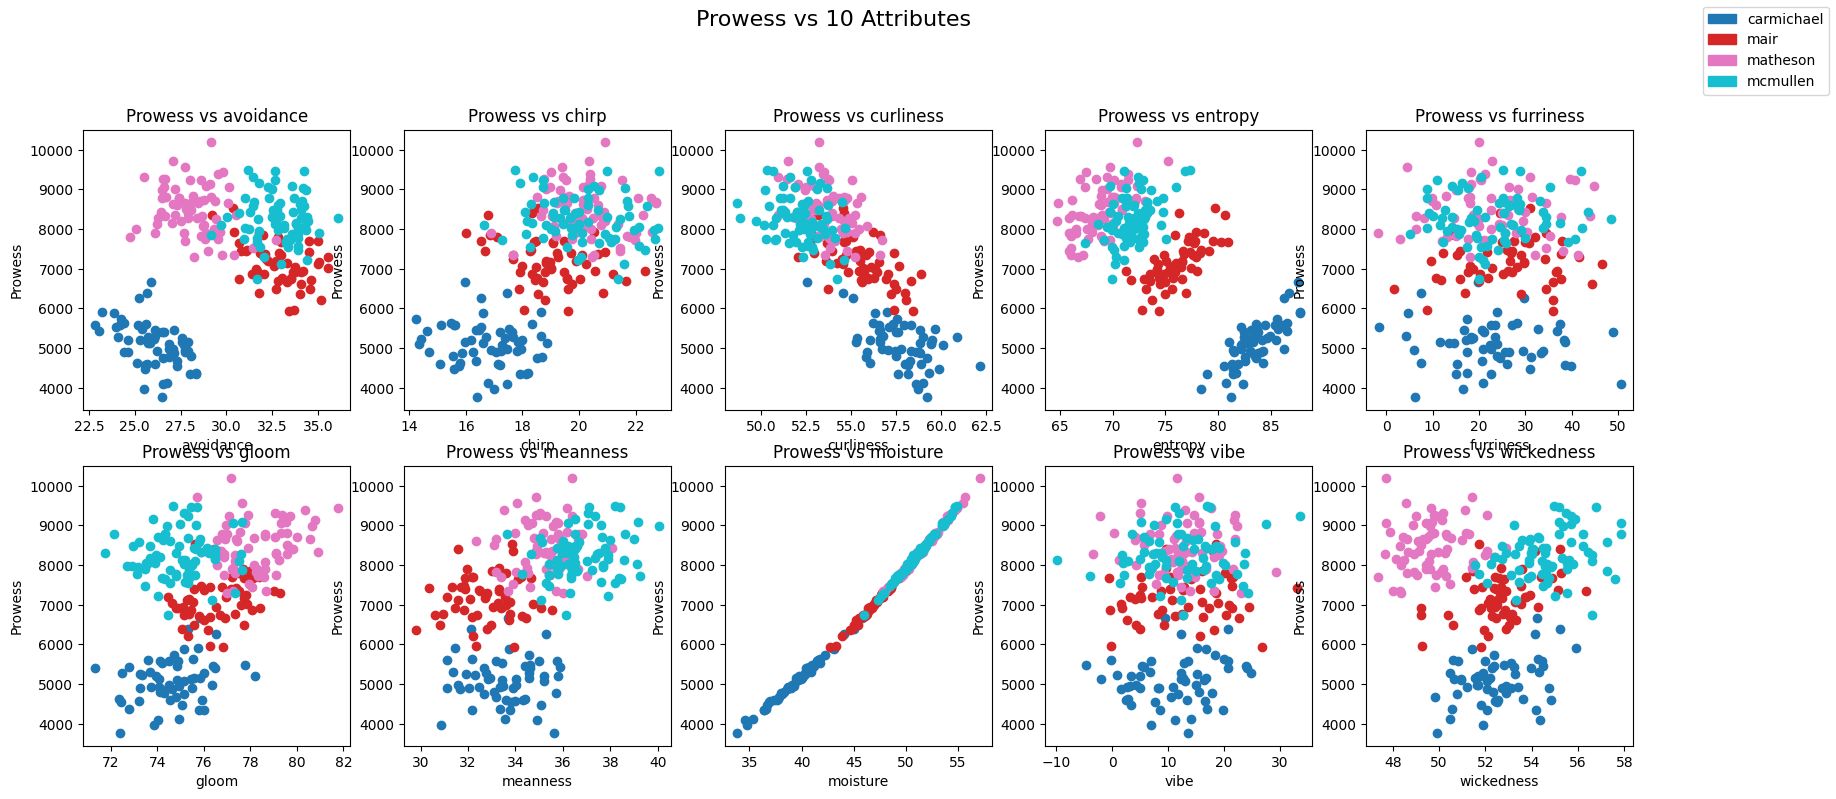

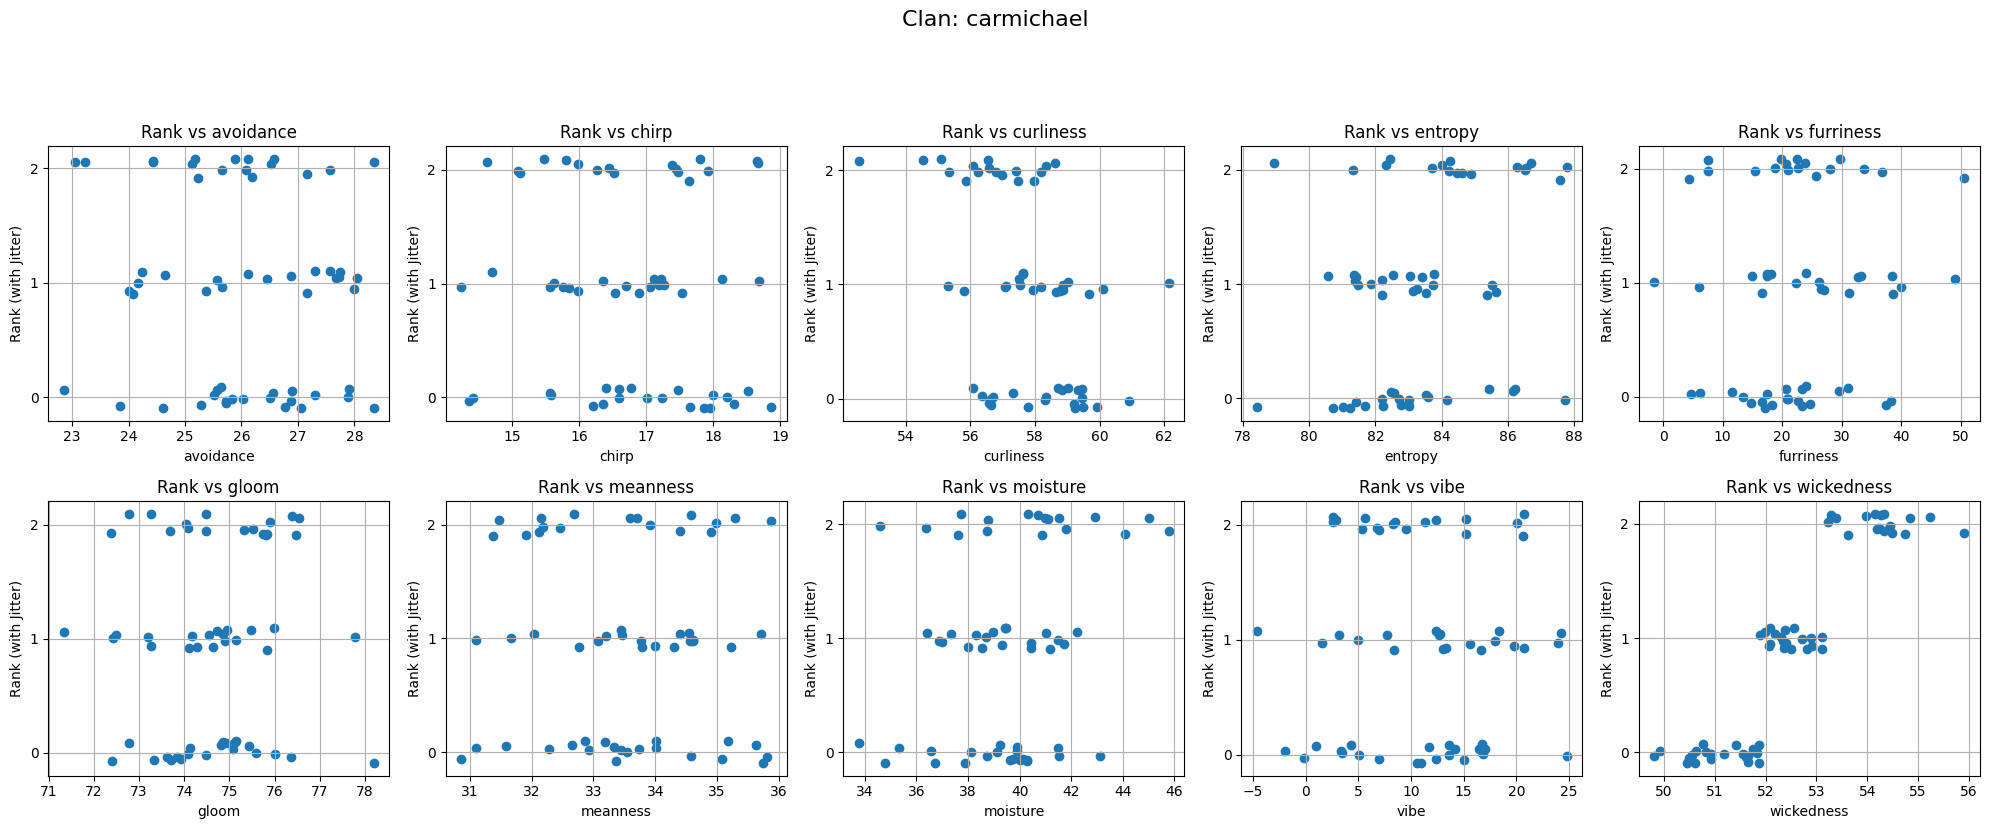

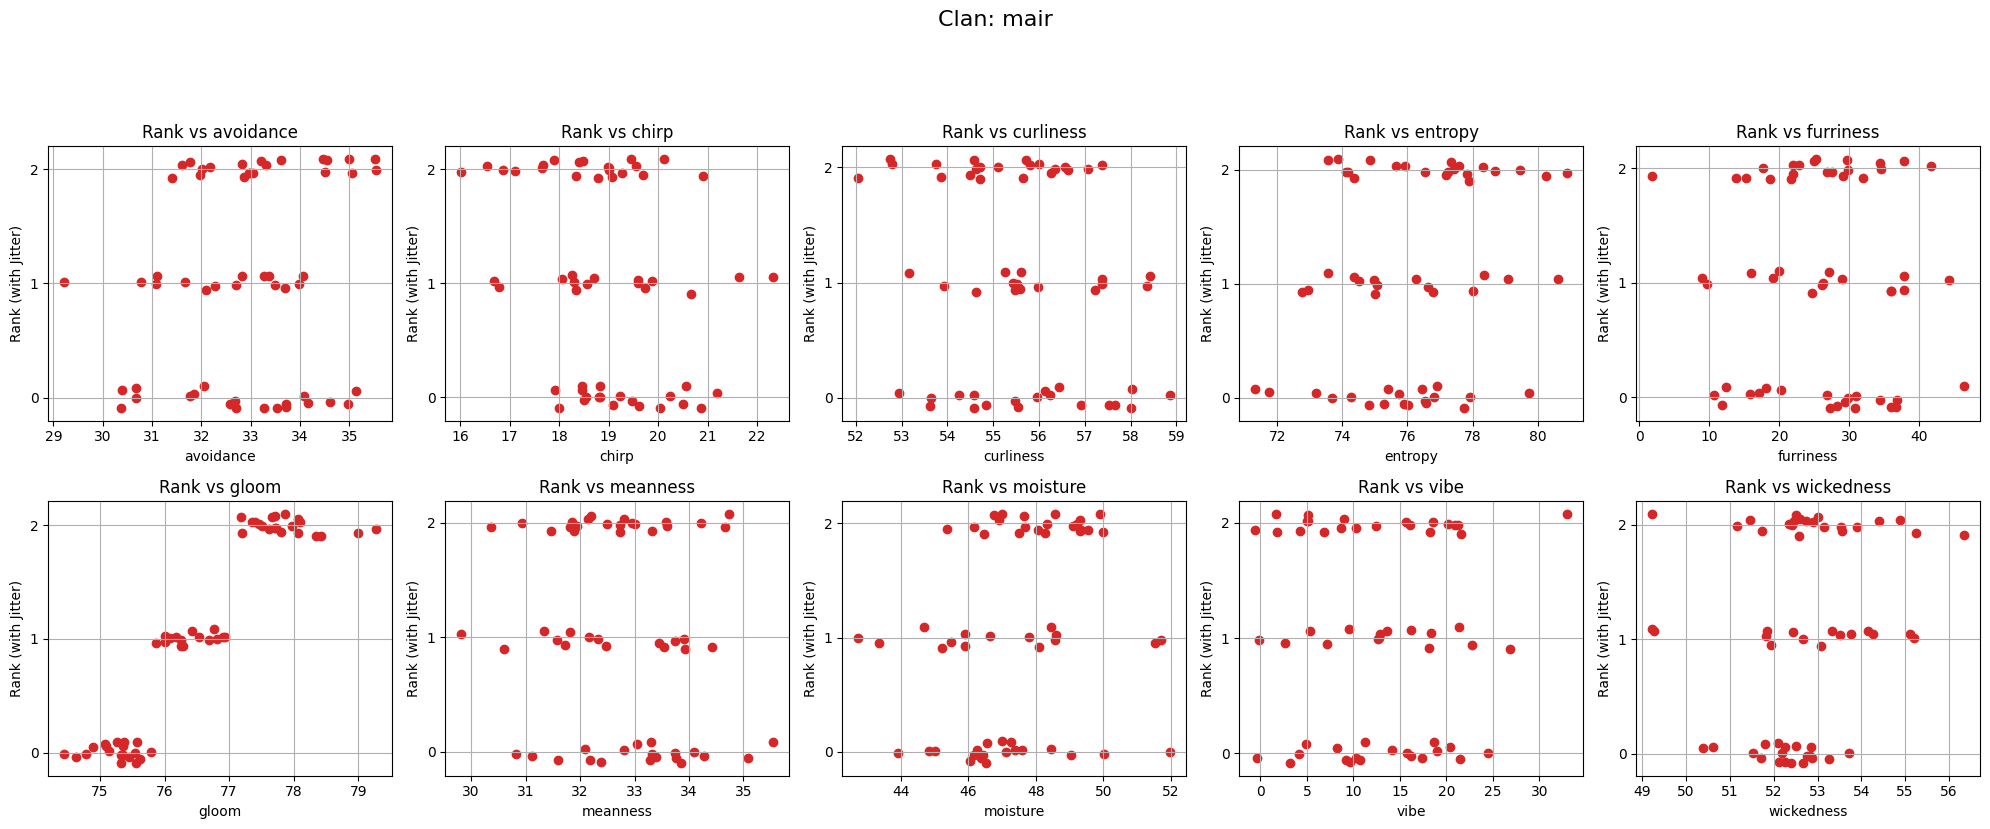

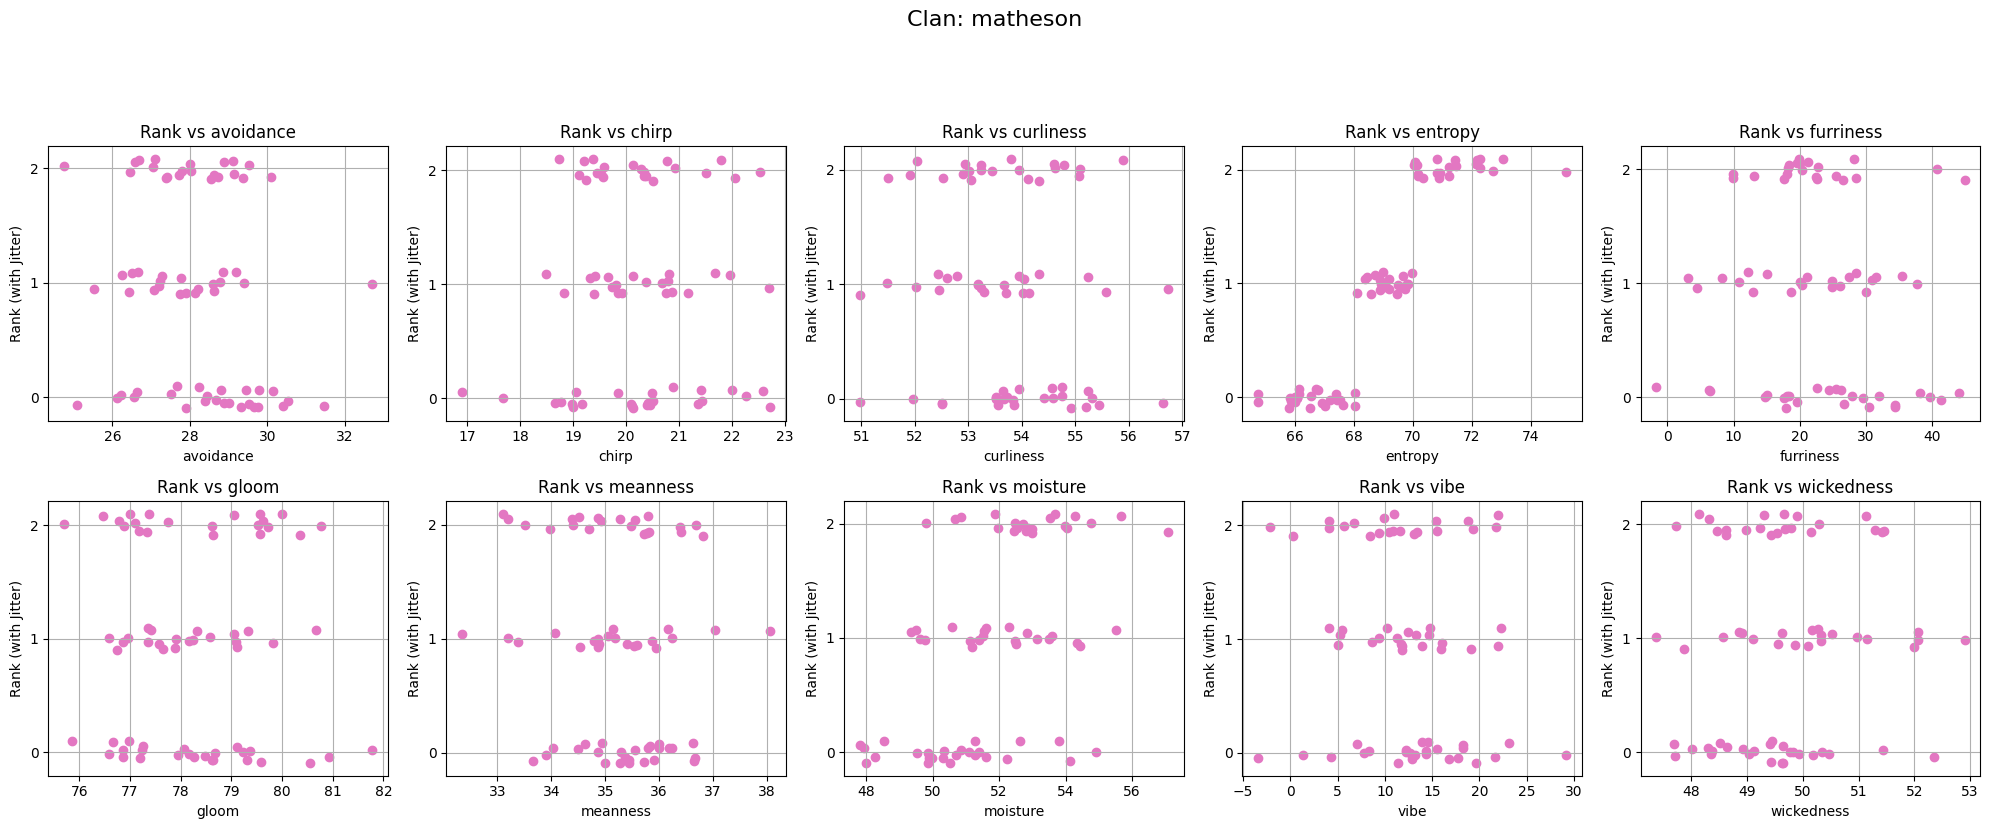

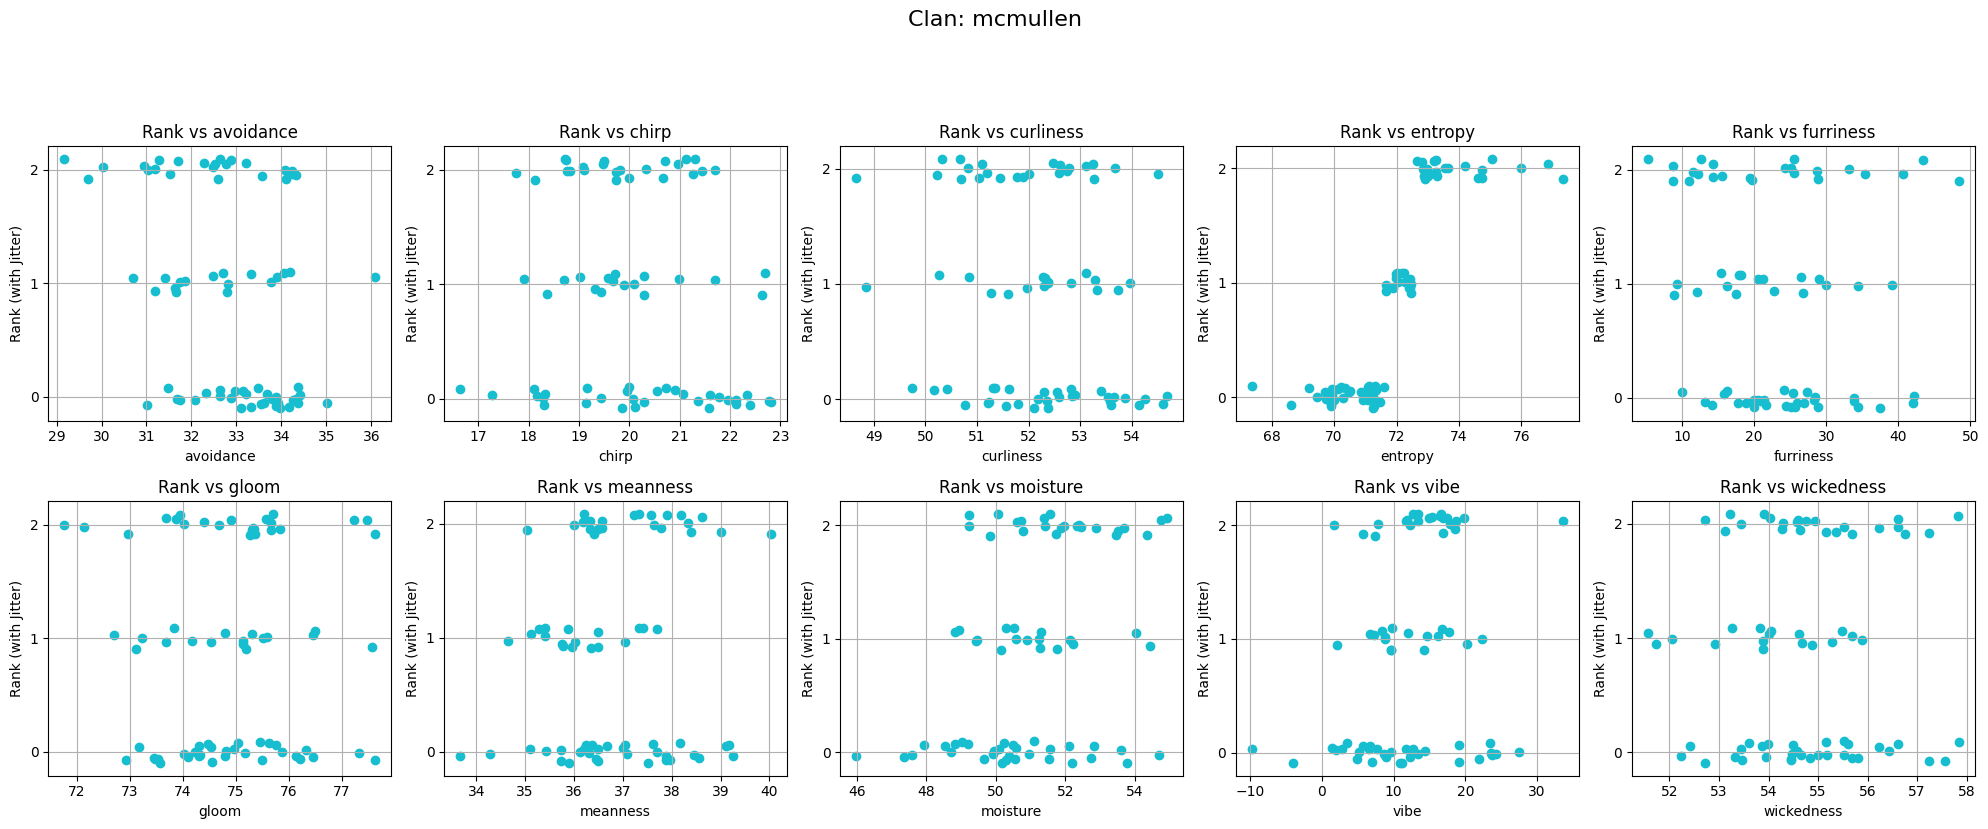

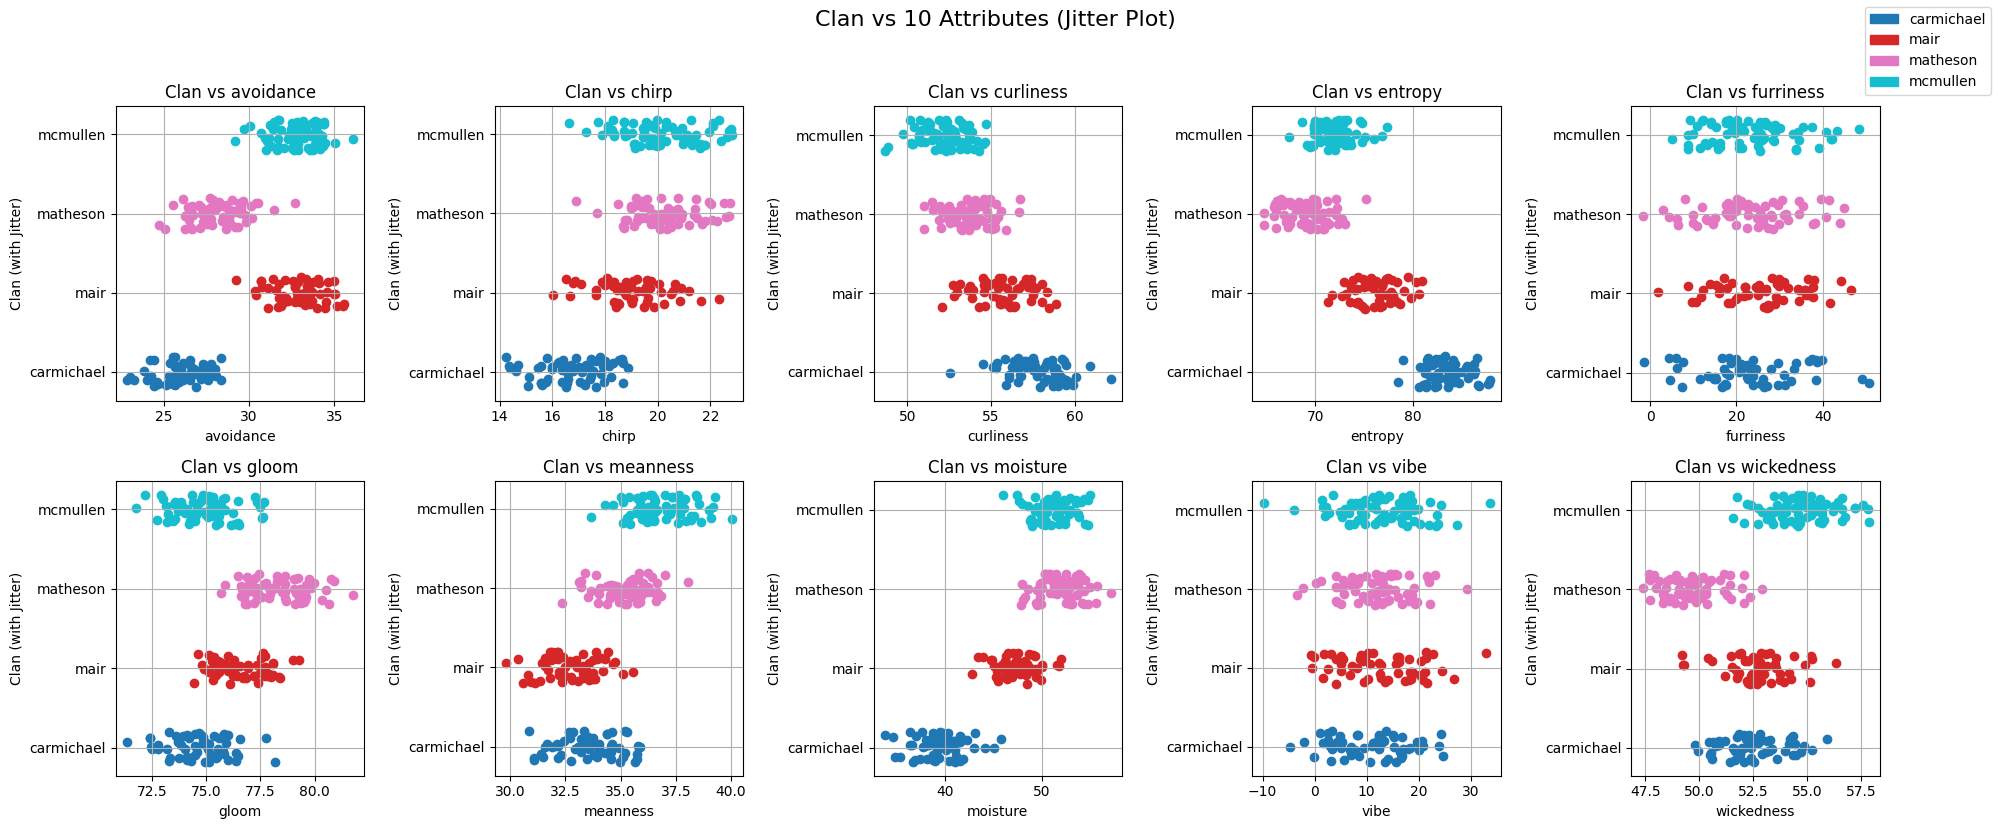

In [22]:
# TODO: add code for task 1

# --- 1. 准备数据 ---
# (数据准备：分离训练数据、定义特征、设置颜色映射)
train_data = data[data['clan'].notnull()].copy()
attributes = ['avoidance', 'chirp', 'curliness', 'entropy', 'furriness', 'gloom', 'meanness', 'moisture', 'vibe', 'wickedness']
clan_list = sorted(train_data['clan'].unique())
colors = plt.get_cmap('tab10', len(clan_list))
color_map = dict(zip(clan_list, colors.colors))

# --- 2. 图 1: "prowess" vs 10 特征 (按 clan 着色) ---
# (创建 2x5 子图)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# (循环遍历 10 个特征)
for i, attribute in enumerate(attributes):
    # (在每个子图中，按部落循环绘制带颜色的点)
    for clan, color in color_map.items():
        clan_subset = train_data[train_data['clan'] == clan]
        axes[i].scatter(clan_subset[attribute], clan_subset['prowess'],
                        color=color, label=clan)

    # (设置子图标题和标签)
    axes[i].set_title(f'Prowess vs {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Prowess')

# (创建并显示图例)
fig.suptitle('Prowess vs 10 Attributes', fontsize=16, y=1.03)
handles = [plt.Rectangle((0,0),1,1, color=color_map[clan]) for clan in clan_list]
fig.legend(handles, clan_list, loc='upper right')
plt.show() # (显示图表)

# --- 3. 图 2: "rank" vs 10 特征 (拆分为 4 个部落) ---
# (循环遍历 4 个部落，为每个部落单独创建一套图表)
for clan in clan_list:

    # (为当前部落创建 2x5 的子图网格)
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    # (筛选出当前部落的数据)
    clan_data = train_data[train_data['clan'] == clan]

    # (保持颜色一致)
    current_clan_color = color_map[clan]

    # (循环遍历 10 个特征)
    for i, attribute in enumerate(attributes):

        # (为 rank 添加抖动)
        rank_jittered = clan_data['rank'] + np.random.uniform(-0.1, 0.1, size=len(clan_data))

        # (只绘制当前部落的数据)
        axes[i].scatter(clan_data[attribute], rank_jittered, color=current_clan_color)

        # (设置子图标题和标签)
        axes[i].set_title(f'Rank vs {attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Rank (with Jitter)')
        axes[i].set_yticks([0, 1, 2])
        axes[i].set_yticklabels(['0', '1', '2'])
        axes[i].grid(True) # (加上网格以便查看)

    # (为整套图表添加一个总标题)
    fig.suptitle(f'Clan: {clan}', fontsize=16, y=1.03)

    # (调整布局防止标题重叠)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # (显示当前部落的整套图表)
    plt.show()

# --- 4. 图 3: "clan" vs 10 特征 (抖动散点图) ---
# (需要为 clan 的 Y 轴创建数字映射)
clan_to_num = {clan: i for i, clan in enumerate(clan_list)}
num_to_clan = {i: clan for i, clan in enumerate(clan_list)}

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# (循环遍历 10 个特征)
for i, attribute in enumerate(attributes):
    # (在每个子图中，按部落循环绘制带颜色的点)
    for clan, color in color_map.items():
        clan_subset = train_data[train_data['clan'] == clan]

        # (获取 clan 的数字 Y 值)
        clan_num = clan_to_num[clan]
        # (为 Y 值添加抖动)
        clan_jittered = clan_num + np.random.uniform(-0.2, 0.2, size=len(clan_subset))

        axes[i].scatter(clan_subset[attribute], clan_jittered,
                        color=color, label=clan)

    # (设置子图标题和标签)
    axes[i].set_title(f'Clan vs {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Clan (with Jitter)')
    # (将 Y 轴的数字 0,1,2,3 替换回部落名字)
    axes[i].set_yticks(list(num_to_clan.keys()))
    axes[i].set_yticklabels(list(num_to_clan.values()))
    axes[i].grid(True)

# (创建并显示图例)
fig.suptitle('Clan vs 10 Attributes (Jitter Plot)', fontsize=16, y=1.03)
handles = [plt.Rectangle((0,0),1,1, color=color_map[clan]) for clan in clan_list]
fig.legend(handles, clan_list, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show() # (显示图表)

**TODO**:
* briefly explain what you have done
and why

(max 50 words)

I plotted three scatter plot sets for prowess, rank, and clan against 10 attributes to see their relationships. The plots show prowess has a linear relationship with wickedness. Each clan uses a unique attribute for rank. The relationships between clans and 10 attributes are difficult to tell from the plots.

# Task 2: Who is who? (20 marks)

Although you have stats on all the moot participants, you do not know
which clans they belong to, nor how they fit into the game.

In this task, you are required to answer that first question: which clans
are the participants from?
* How will you formulate this as a machine learning problem?
* What assumptions do you need to make?
* How confident are you of your predictions?

When you have made your predictions, copy the values into the `answers` dataframe.

In [23]:
# TODO: add code for task 2

# --- 1. 准备数据 (所有方案通用) ---
train_data = data[data['clan'].notnull()]
predict_data = data[data['clan'].isnull()]

features = ['avoidance', 'chirp', 'curliness', 'entropy', 'furriness', 'gloom', 'meanness', 'moisture', 'vibe', 'wickedness']

X_train = train_data[features]
y_train = train_data['clan']
X_predict = predict_data[features]

# 获取我们要填充的索引
answers_index = predict_data.index

# --- 随机森林 ---

# 2. 训练模型
model = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. 预测
clan_predictions = model.predict(X_predict)

# --- 4. 存储结果 ---
data_result = data.copy()
data_result.loc[answers_index, 'clan'] = clan_predictions

# 打印 data_result
print(data_result)
answers = data_result

     avoidance  chirp  curliness  entropy  furriness  gloom  meanness  \
0        34.32  20.70      50.22    73.64      15.53  74.40     40.04   
1        33.38  19.60      58.43    74.37      35.98  76.82     33.92   
2        33.11  19.85      52.82    71.33      42.19  75.49     36.20   
3        27.57  17.38      55.34    84.63      18.82  73.27     31.91   
4        31.41  18.33      57.08    73.55      25.24  78.06     31.82   
..         ...    ...        ...      ...        ...    ...       ...   
495      24.46  16.87      57.67    85.59       5.54  74.91     30.72   
496      31.22  18.81      50.88    73.09      29.72  76.34     37.63   
497      33.76  19.39      51.11    73.14      28.43  74.65     36.81   
498      28.28  19.61      56.06    64.69      38.94  77.95     34.84   
499      25.28  15.09      59.67    81.77      27.89  73.92     34.53   

     moisture   vibe  wickedness        clan  prowess  rank  
0       53.45  18.42       55.36    mcmullen  8993.27   2.0  

**TODO**:
* briefly explain what you have done and why

(max 50 words)

This is a classification task. I trained a RandomForestClassifier to predict clan because it's simple when data range from different scales, it's securer than a single dicision tree and it's less sensitive with noise than AdaBoost.

# Task 3: How are players ranked? (20 marks)

You know that Grachlangenball players are **ranked** on
a simple ordinal scale with three levels — 0, 1 and 2.
Players only compete against others of the same rank.

Each clan has its own traditional criteria for awarding ranks,
and they guard the details jealously. But by all accounts the
rules are very simple. As one informant undiplomatically noted
— after carefully making sure no clansfolk were within earshot —
“Not one o' these slaverin' dobbies can hold two thoughts in
their heads at the same time!”

Given last year's rankings, can you figure out the criteria for
each clan and assign ranks to all this year's participants?

Once again, when you have done so, add your rank predictions to
the `answers` table.

In [24]:
# TODO: add code for task 3

# --- 1. 准备数据 ---
# 用 'data' (原始) 来训练
train_data = data[data['rank'].notnull()]
# 用 'data_result' (T2 结果) 来预测
predict_data = data_result[data_result['rank'].isnull()]

features = ['avoidance', 'chirp', 'curliness', 'entropy', 'furriness', 'gloom', 'meanness', 'moisture', 'vibe', 'wickedness']
clan_list = train_data['clan'].unique()

# --- 2. 训练 4 个独立的 "简单规则" 模型 ---
clan_models = {} # 存储 4 个模型
for clan in clan_list:
    clan_train_data = train_data[train_data['clan'] == clan]
    X_train_clan = clan_train_data[features]
    y_train_clan = clan_train_data['rank']

    # 只做2次判断的决策树
    model = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=42)
    model.fit(X_train_clan, y_train_clan)
    clan_models[clan] = model # 存储规则

# --- 3. 应用规则进行预测 ---
# 在 'data_result' 上应用规则
for clan_name, group in predict_data.groupby('clan'):
    group_indices = group.index
    model = clan_models[clan_name] # 获取专属模型
    X_predict_clan = group[features]
    clan_rank_predictions = model.predict(X_predict_clan)

    # 将预测结果填回 'data_result'
    data_result.loc[group_indices, 'rank'] = clan_rank_predictions

print(data_result)
answers = data_result

     avoidance  chirp  curliness  entropy  furriness  gloom  meanness  \
0        34.32  20.70      50.22    73.64      15.53  74.40     40.04   
1        33.38  19.60      58.43    74.37      35.98  76.82     33.92   
2        33.11  19.85      52.82    71.33      42.19  75.49     36.20   
3        27.57  17.38      55.34    84.63      18.82  73.27     31.91   
4        31.41  18.33      57.08    73.55      25.24  78.06     31.82   
..         ...    ...        ...      ...        ...    ...       ...   
495      24.46  16.87      57.67    85.59       5.54  74.91     30.72   
496      31.22  18.81      50.88    73.09      29.72  76.34     37.63   
497      33.76  19.39      51.11    73.14      28.43  74.65     36.81   
498      28.28  19.61      56.06    64.69      38.94  77.95     34.84   
499      25.28  15.09      59.67    81.77      27.89  73.92     34.53   

     moisture   vibe  wickedness        clan  prowess  rank  
0       53.45  18.42       55.36    mcmullen  8993.27   2.0  

**TODO**:
* briefly explain what you have done and why
* state the ranking criteria for each clan

(max 50 words)

This is a classification task. As the plot in task 1 shows that the relationship is very simple and only need to judge twice, I choose decision tree with 'max_depth=2'. The models show each clan uses one of the 10 atrributes with two thresholds to assign three ranks.

-----

* Mcmullen uses entropy.

Rank 0: entropy <= 71.63

Rank 1: 71.63 < entropy <= 72.555

Rank 2: entropy > 72.555

* Mair uses gloom.

Rank 0: gloom <= 75.83

Rank 1: 75.83 < gloom <= 77.06

Rank 2: gloom > 77.06

* Carmichael uses wickedness.

Rank 0: wickedness <= 51.89

Rank 1: 51.89 < wickedness <= 53.175

Rank 2: wickedness > 53.175

* Matheson uses entropy.

Rank 0: entropy <= 68.095

Rank 1: 68.095 < entropy <= 70.0

Rank 2: entropy > 70.0

# Task 4: What is **prowess**? (20 marks)

When two players square off in a Grachlangenball match, the winner is
determined by their relative **prowess**.

This mysterious quality is defined and assessed by the Grachlangenball
Prowess Trust, a cabal of wily sages who lay down the rules of the game.
The Trust loudly proclaim their independence from all the clans, but
Machlearnia is a cynical place and conspiratorial rumours abound.

It is widely agreed that the Trust members are a cut above the
clansfolk intellectually, and the prowess calculation is not as
simple as the rankings. It *is* still fairly simple, though. According
to a down-at-heel bard you met in a tavern, whose unhappy romantic history
included not one but two members of the Trust, the prowess formula has
only “a handful” of terms, and he believed those terms to have
**integer coefficients**. Though he couldn't tell you what either of
those words mean.

Your task is to figure out what this formula is and work out the prowess
for all participants. Add those values into the `answers` dataframe too.

In [25]:
# TODO: add code for task 4

# --- 1. 准备数据 ---
# 训练数据: 来自原始的 'data' (有 prowess)
train_data = data[data['prowess'].notnull()]
# 预测数据: 来自 'data_result' (T2, T3 已填充)
predict_data = data_result[data_result['prowess'].isnull()]

features = ['avoidance', 'chirp', 'curliness', 'entropy', 'furriness', 'gloom', 'meanness', 'moisture', 'vibe', 'wickedness']

X_train = train_data[features]
y_train = train_data['prowess']
X_predict = predict_data[features]

# --- 2. 步骤 1: 使用 Lasso 找到 "少数几项" ---
# (Lasso 已在 notebook 顶部导入)
# alpha 是惩罚强度。一个中等的值
# 比如 1.0 已经足够。
lasso_model = sklearn.linear_model.Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train, y_train)

# 找出 Lasso 认为 "重要" (非零) 的特征
important_features = features.copy()
coefs = lasso_model.coef_
# 我们只保留系数不为零的特征
important_features = [feat for feat, coef in zip(features, coefs) if coef != 0]

# --- 3. 步骤 2: 在 "重要" 特征上训练线性模型 ---
# (LinearRegression 已在 notebook 顶部导入)
# 现在我们只用 Lasso 选出的特征
lr_model = sklearn.linear_model.LinearRegression()
lr_model.fit(X_train[important_features], y_train)

# --- 4. 步骤 3: 获取 "整数系数" 公式 ---
# (这就是酒馆里传闻的公式)
int_coefs = np.round(lr_model.coef_)
int_intercept = np.round(lr_model.intercept_)

# --- 5. 步骤 4: 应用整数公式进行预测 ---
# 我们在 X_predict 上只使用 "重要" 特征
X_predict_important = X_predict[important_features]

# 手动应用公式: (X @ B) + intercept
# X_predict_important @ int_coefs 是矩阵乘法,
# 完美地应用了 `(f1*c1) + (f2*c2) + ...`
prowess_predictions = (X_predict_important @ int_coefs) + int_intercept

# --- 6. 存储结果 ---
data_result.loc[predict_data.index, 'prowess'] = prowess_predictions

print(data_result)
answers = data_result

     avoidance  chirp  curliness  entropy  furriness  gloom  meanness  \
0        34.32  20.70      50.22    73.64      15.53  74.40     40.04   
1        33.38  19.60      58.43    74.37      35.98  76.82     33.92   
2        33.11  19.85      52.82    71.33      42.19  75.49     36.20   
3        27.57  17.38      55.34    84.63      18.82  73.27     31.91   
4        31.41  18.33      57.08    73.55      25.24  78.06     31.82   
..         ...    ...        ...      ...        ...    ...       ...   
495      24.46  16.87      57.67    85.59       5.54  74.91     30.72   
496      31.22  18.81      50.88    73.09      29.72  76.34     37.63   
497      33.76  19.39      51.11    73.14      28.43  74.65     36.81   
498      28.28  19.61      56.06    64.69      38.94  77.95     34.84   
499      25.28  15.09      59.67    81.77      27.89  73.92     34.53   

     moisture   vibe  wickedness        clan  prowess  rank  
0       53.45  18.42       55.36    mcmullen  8993.27   2.0  

**TODO**:
* briefly explain what you have done and why
* state the prowess formula you have inferred

(max 50 words)

This is a regression task. As the plot in task 1 shows, prowess has a significant linear relationship with moisture. I use Lasso because it can turn coefficients to exact zero, enabling feature selection, unlike Ridge. LinearRegression provides a linear fomula using 10 attributes to predict prowess.

-----

prowess = (-9 * avoidance) + (-4 * chirp) + (1 * entropy) + (4 * furriness) + (-4 * gloom) + (20 * meanness) + (277 * moisture) + (-3 * wickedness) + -5906

# Task 5: Tournament (10 marks)

A Grachlangenball tournament consists of a **round robin** series of
matches between the clans, such that within each rank each clan plays
against every other clan exactly once. So there will be

$$
\binom{n_{clans}}{2} \times n_{ranks}
$$

matches — 12 in this case.

For each individual match, one player of the appropriate rank is chosen
at random from each of the two clans, and the two players go head to
head. The course of the game involves a lot of flexing and posturing,
psych-outs and threats, thrusts and parries, athleticism, skill and
furious appeals to the referee. At the end of which performance, and
regardless of whatever occurred in the meantime, the player with the
highest prowess is declared the winner.

Once all the matches have taken place, if there is one clan with the
most wins, that clan takes the title and the tournament is over. But
if there are multiple clans with the same highest number of wins, any
lower scoring clans are eliminated and the whole process starts over
with the remaining clans. This can continue for up to five complete
rounds. If there still isn't a clear winner on the fifth round, a draw
is declared.

**Nobody likes a draw.**

Given the rules as described above, together with the team stats
estimated in tasks 2–4, can you work out the approximate probabilities
of each clan winning this year's tournament?

In [26]:
# TODO: add code for task 5

# --- 关键: 定义我们将用于模拟的 "选手池" ---
# 我们只关心今年的参赛者 (即那些在 *原始* 'data' 中 'prowess' 为空的行)
# 我们使用 'data_result' (已填充所有预测)
simulation_pool = data_result[data['prowess'].isnull()]
all_clans = list(simulation_pool['clan'].unique())
all_ranks = [0.0, 1.0, 2.0]

# --- 1. 创建 "选手池" 字典 (优化) ---
# 为了让模拟跑得快, 我们先把所有选手按 "部落" 和 "等级" 分好
player_pool = {}
for clan in all_clans:
    player_pool[clan] = {}
    for rank in all_ranks:
        # 获取这个部落、这个等级的所有选手的 prowess 值
        players = simulation_pool[
            (simulation_pool['clan'] == clan) & (simulation_pool['rank'] == rank)
        ]['prowess'].values
        player_pool[clan][rank] = players

# --- 2. 单场比赛模拟函数 ---
# 作用: 真正地从两个部落中 "随机各挑一人" 并比较
def simulate_match(clanA, clanB, rank_level):
    # 从我们准备好的 "选手池" 字典中获取列表
    players_A = player_pool[clanA][rank_level]
    players_B = player_pool[clanB][rank_level]

    # --- 核心: 随机挑一人 ---
    # (np.random.choice 从列表中随机选一个)
    player_A_prowess = np.random.choice(players_A)
    player_B_prowess = np.random.choice(players_B)

    # 规则: prowess 高的获胜
    if player_A_prowess > player_B_prowess:
        return clanA
    else:
        # (如果打平, B 也算获胜, 这不影响概率)
        return clanB

# --- 3. 回合模拟函数 ---
# 作用: 模拟一轮完整的循环赛
def simulate_round(active_clans):
    wins = {clan: 0 for clan in active_clans}

    # 手动生成所有部落组合
    clan_pairs = []
    for i in range(len(active_clans)):
        for j in range(i + 1, len(active_clans)):
            clan_pairs.append((active_clans[i], active_clans[j]))

    # 循环 3 个 rank
    for rank_level in all_ranks:
        # 循环所有部落组合
        for clanA, clanB in clan_pairs:

            # --- 核心: 模拟这场比赛 ---
            winner = simulate_match(clanA, clanB, rank_level)

            if winner is not None:
                wins[winner] += 1
    return wins

# --- 4. 锦标赛模拟函数 ---
# 作用: 模拟一场完整的锦标赛, 最多 5 轮
def simulate_tournament():
    active_clans = all_clans[:] # ([:] 是复制列表的简单方法)

    for _ in range(5): # 最多 5 轮
        round_wins = simulate_round(active_clans)
        max_wins = max(round_wins.values())
        winners = [clan for clan, score in round_wins.items() if score == max_wins]

        if len(winners) == 1:
            return winners[0] # 找到唯一获胜者

        active_clans = winners # 平局, 只有并列第一的部落进入下一轮

    return 'DRAW' # 5 轮后仍为平局

# --- 5. 运行模拟并打印结果 ---
N_SIMULATIONS = 10000
results = []
for i in range(N_SIMULATIONS):
    results.append(simulate_tournament())

results_series = pd.Series(results)
probabilities = results_series.value_counts(normalize=True) * 100

print(probabilities)

matheson    71.25
mcmullen    28.75
Name: proportion, dtype: float64


**TODO**:
* briefly explain what you have done and why
* what is your estimated win probability for each clan?

(max 50 words)

I have simply simulated the matches as said for 10000 times to see the probabilites. The result is matheson has a probability of about 71% to win and mcmullen has about 29%. Carmichael and mair are unlike to win and both have a probability of 0%.

# Task 6: What chance peace? (10 marks)

As already noted, **nobody likes a draw.**

Draws are no fun. All bets are void. Machlearnia has no Heroes.

There is (according to the grim precepts of the clans) honour in
losing bravely against a valiant foe. But there is no honour in
losing to also-losers. *Everyone* loses. Everyone slinks home
shamefaced, vowing never to speak of it again.

It is generally understood that this level of shame is not
sustainable. If the moot were to **end in a draw for two years
running**, the clans would inevitably cast aside the empty
masquerade of “peace” and return to their traditional pastimes
of slaughter and mayhem.

At the same time, **nobody likes an unwinnable game**. If the
same clan keeps winning year after year after year, what's even
the point in playing? Might as well go on a bloody rampage with
lashings of the old ultraviolence.

The clans respect strength and are more tolerant of dominance than
equality. But **five wins in a row** would stir up suspicions as to
the impartiality of the Grachlangenball Prowess Trust — with inevitably
brutal consequences.

You don't know what the result was last year, only that it concluded
peacefully.

How likely is it that this Clanmoot will end in a bloodbath?

For that matter, how surprising is it that the current peace has
held for 38 years?

In [29]:
# TODO: add code for task 6

# --- 1. 回答问题 1: "今年的" 风险 ---
# (这是一个逻辑问题, 不是计算问题)
# "去年和平结束" = 去年不是 DRAW
# "连续两年 DRAW" -> 今年不可能触发
# "连续 5 年获胜" -> 我们不知道前 4 年, 无法触发
prob_bloodbath_this_year = 0.0
print(f"--- Task 6, 问题 1 ---")
print(f"今年 (This Clanmoot) 导致屠杀的概率: {prob_bloodbath_this_year * 100}%")


# --- 2. 回答问题 2: "38 年和平" 的惊奇程度 ---
print(f"\n--- Task 6, 问题 2 ---")

# 我们需要 Task 5 的 'probabilities' (它是一个百分比 Series)
# 将它转换回 0-1 之间的小数
probs_decimal = probabilities / 100

# 提取 P(DRAW)
if 'DRAW' in probs_decimal:
    p_draw = probs_decimal['DRAW']
else:
    p_draw = 0.0 # (如果 DRAW 从未发生过)

# 提取所有获胜部落的概率
p_clans = probs_decimal.drop('DRAW', errors='ignore')

# --- 2a. 计算 P(屠杀 1 年) ---
# 触发 1: 连续两年平局的概率
p_fail_draw = p_draw * p_draw

# 触发 2: 任意部落 5 连胜的概率
# (我们计算每个部落 5 次方的概率, 然后求和)
p_fail_5_streak = (p_clans ** 5).sum()

# 任意一年触发屠杀的总概率
p_fail_total_per_year = p_fail_draw + p_fail_5_streak

print(f"任意一年爆发屠杀 (5 连胜或 2 连平) 的概率: {p_fail_total_per_year * 100:.4f}%")

# --- 2b. 计算 P(和平 1 年) ---
p_peace_per_year = 1 - p_fail_total_per_year
print(f"任意一年维持和平的概率: {p_peace_per_year * 100:.4f}%")

# --- 2c. 计算 P(和平 38 年) ---
p_peace_38_years = p_peace_per_year ** 38
print(f"和平连续维持 38 年的概率: {p_peace_38_years * 100:.10f}%")

if p_peace_38_years < 0.001: # (即 0.1%)
    print("结论: 这 38 年的和平是 *极其* 令人惊讶 (和幸运) 的!")
else:
    print("结论: 这 38 年的和平是完全可能的。")

--- Task 6, 问题 1 ---
今年 (This Clanmoot) 导致屠杀的概率: 0.0%

--- Task 6, 问题 2 ---
任意一年爆发屠杀 (5 连胜或 2 连平) 的概率: 18.5586%
任意一年维持和平的概率: 81.4414%
和平连续维持 38 年的概率: 0.0409371458%
结论: 这 38 年的和平是 *极其* 令人惊讶 (和幸运) 的!


**TODO**:
* briefly explain what you have done and why
* should you get the hell out of Dodge?

(max 50 words)

I calculated the probability of bloodbath based on Task 5's results. The probability this year is 0% and The long-term probability is 18.6% annually, making the probability of 38 years of peace drop to 0.04%, which means it will be extremely surprising.

# Exporting & Submitting

You should submit your answers via Moodle. Text and code will be
manually graded in this notebook. Your predictions for tasks 4—6 will
be marked automatically.

* Ensure that your predictions for **clan**, **rank** and **prowess**
are recorded in the `answers` dataframe.
* Run the cell below to export the `answers` dataframe as a CSV file.


In [28]:
answers.to_csv('3114906121.csv', index=False)

* Download both the `3114906121.csv` file you just exported and your
completed notebook file (`3114906121.ipynb`).
* Zip both files into an archive called `3114906121.zip` and submit
this using the coursework submission activity on Moodle.